<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_250-300.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [642]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [643]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

RDKit ERROR: [17:25:24] non-ring atom 1 marked aromatic


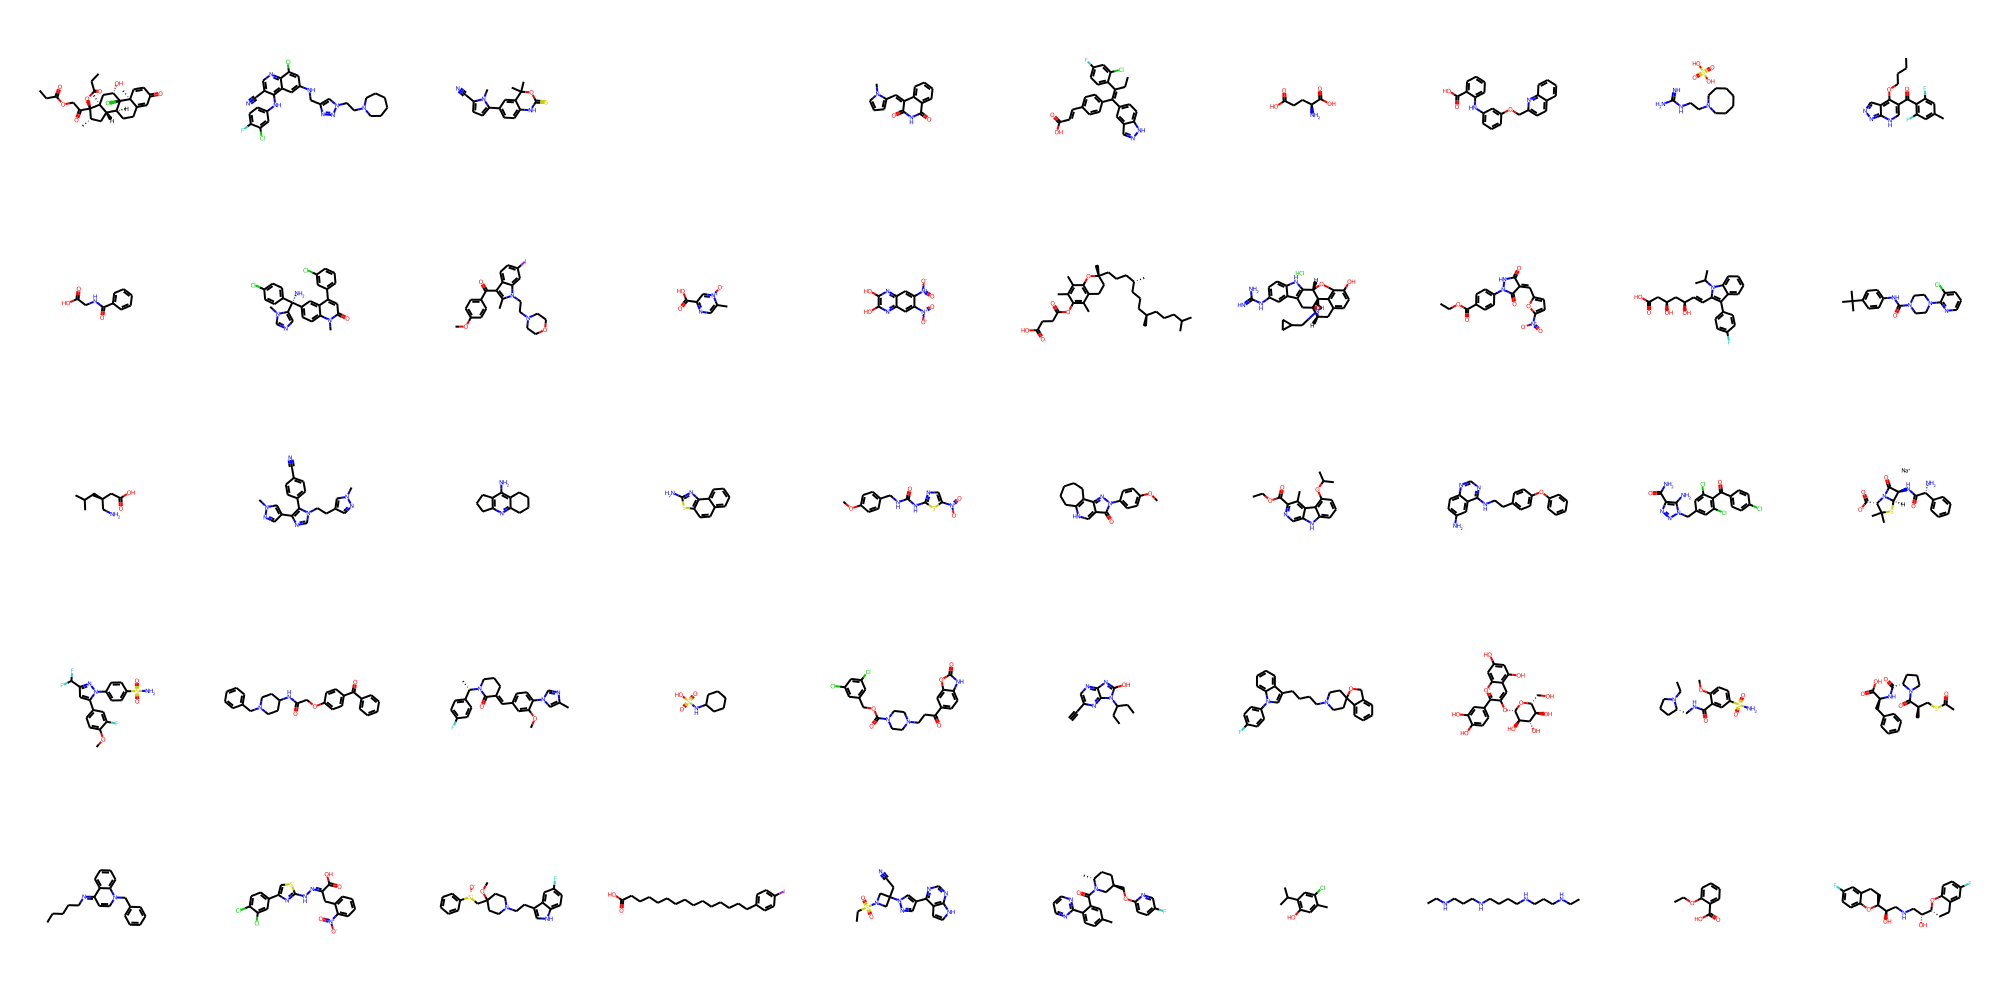

In [644]:
smiles_list = ['CCC(=O)OCC(=O)[C@@]1(OC(=O)CC)[C@@H](C)C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(Cl)[C@@H](O)C[C@@]21C',
'N#Cc1cnc2c(Cl)cc(NCc3cn(CCN4CCCCCC4)nn3)cc2c1Nc1ccc(F)c(Cl)c1',
'Cn1c(C#N)ccc1-c1ccc2c(c1)C(C)(C)OC(=S)N2',
'No Data',
'Cn1cccc1/C=C1\C(=O)NC(=O)c2ccccc21',
'CC/C(=C(/c1ccc(/C=C/C(=O)O)cc1)c1ccc2[nH]ncc2c1)c1ccc(F)cc1Cl',
'N[C@@H](CCC(=O)O)C(=O)O',
'O=C(O)c1ccccc1Nc1cccc(OCc2ccc3ccccc3n2)c1',
'N=C(N)NCCN1CCCCCCC1.O=S(=O)(O)O',
'CCCCOc1c(C(=O)c2c(F)cc(C)cc2F)c[nH]c2nncc1-2',
'O=C(O)CNC(=O)c1ccccc1',
'Cn1cncc1[C@@](N)(c1ccc(Cl)cc1)c1ccc2c(c1)c(-c1cccc(Cl)c1)cc(=O)n2C',
'COc1ccc(C(=O)c2c(C)n(CCN3CCOCC3)c3cc(I)ccc23)cc1',
'Cc1cnc(C(=O)O)c[n+]1[O-]',
'O=[N+]([O-])c1cc2nc(O)c(O)nc2cc1[N+](=O)[O-]',
'Cc1c(C)c2c(c(C)c1OC(=O)CCC(=O)O)CC[C@@](C)(CCC[C@H](C)CCC[C@H](C)CCCC(C)C)O2',
'Cl.N=C(N)Nc1ccc2[nH]c3c(c2c1)C[C@@]1(O)[C@H]2Cc4ccc(O)c5c4[C@@]1(CCN2CC1CC1)[C@H]3O5',
'CCOC(=O)c1ccc(N2NC(=O)/C(=C/c3ccc([N+](=O)[O-])o3)C2=O)cc1',
'CC(C)n1c(/C=C/[C@@H](O)C[C@@H](O)CC(=O)O)c(-c2ccc(F)cc2)c2ccccc21',
'CC(C)(C)c1ccc(NC(=O)N2CCN(c3ncccc3Cl)CC2)cc1',
'CC(C)C[C@H](CN)CC(=O)O',
'Cn1cc(CCn2cnc(-c3cnn(C)c3)c2-c2ccc(C#N)cc2)cn1',
'Nc1c2c(nc3c1CCC3)CCCC2',
'Nc1nc2c(ccc3ccccc32)s1',
'COc1ccc(CNC(=O)Nc2ncc([N+](=O)[O-])s2)cc1',
'COc1ccc(-n2nc3c4c([nH]cc-3c2=O)CCCCC4)cc1',
'CCOC(=O)c1ncc2[nH]c3cccc(OC(C)C)c3c2c1C',
'Nc1ccc2ncnc(NCCc3ccc(Oc4ccccc4)cc3)c2c1',
'NC(=O)c1nnn(Cc2cc(Cl)c(C(=O)c3ccc(Cl)cc3)c(Cl)c2)c1N',
'CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccccc3)C(=O)N2[C@H]1C(=O)[O-].[Na+]',
'COc1ccc(-c2cc(C(F)F)nn2-c2ccc(S(N)(=O)=O)cc2)cc1F',
'O=C(COc1ccc(C(=O)c2ccccc2)cc1)NC1CCN(Cc2ccccc2)CC1',
'COc1cc(/C=C2\CCCN([C@@H](C)c3ccc(F)cc3)C2=O)ccc1-n1cnc(C)c1',
'O=S(=O)(O)NC1CCCCC1',
'O=C(CCN1CCN(C(=O)OCc2cc(Cl)cc(Cl)c2)CC1)c1ccc2[nH]c(=O)oc2c1',
'C#Cc1cnc2nc(O)n(C(CC)CC)c2n1',
'Fc1ccc(-n2cc(CCCCN3CCC4(CC3)OCc3ccccc34)c3ccccc32)cc1',
'OC[C@H]1O[C@@H](Oc2cc3c(O)cc(O)cc3[o+]c2-c2ccc(O)c(O)c2)[C@H](O)[C@@H](O)[C@@H]1O',
'CCN1CCC[C@H]1CNC(=O)c1cc(S(N)(=O)=O)ccc1OC',
'CC(=O)SC[C@@H](C)C(=O)N1CCC[C@H]1C(=O)N[C@@H](Cc1ccccc1)C(=O)O',
'CCCCC/N=c1\ccn(Cc2ccccc2)c2ccccc12',
'O=C(O)/C(Cc1ccccc1[N+](=O)[O-])=N/Nc1nc(-c2ccc(Cl)c(Cl)c2)cs1',
'COC1(C[S@@+]([O-])c2ccccc2)CCN(CCc2c[nH]c3ccc(F)cc23)CC1',
'O=C(O)CCCCCCCCCCCCCCc1ccc(I)cc1',
'CCS(=O)(=O)N1CC(CC#N)(n2cc(-c3ncnc4[nH]ccc34)cn2)C1',
'Cc1ccc(-c2ncccn2)c(C(=O)N2C[C@H](COc3ccc(F)cn3)CC[C@H]2C)c1',
'Cc1cc(O)c(C(C)C)cc1Cl',
'CCNCCCNCCCCNCCCNCC',
'CCOc1ccccc1C(=O)O',
'O[C@H](CNC[C@@H](O)[C@H]1CCc2cc(F)ccc2O1)[C@@H]1CCc2cc(F)ccc2O1',


]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



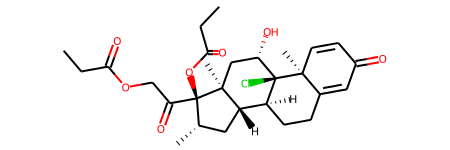

In [645]:
M1 = mol_list [0]
M1

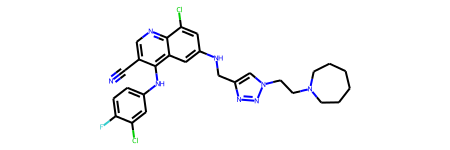

In [646]:
M2 = mol_list [1]
M2

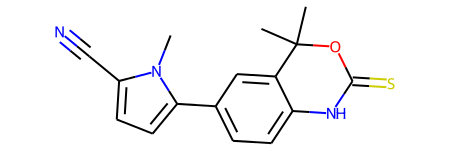

In [647]:
M3 = mol_list [2]
M3

In [648]:
M4 = mol_list [3]
M4

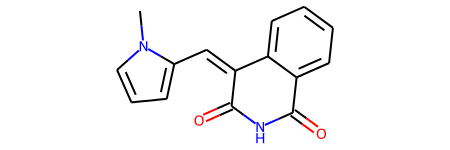

In [649]:
M5 = mol_list [4]
M5

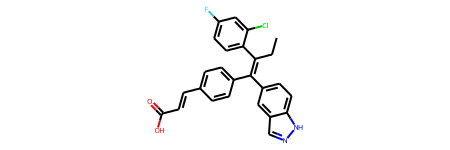

In [650]:
M6 = mol_list [5]
M6

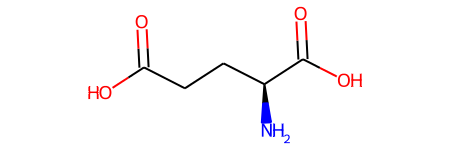

In [651]:
M7 = mol_list [6]
M7

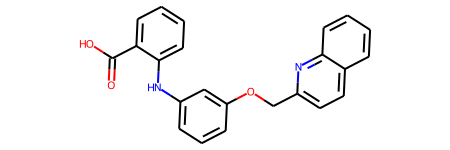

In [652]:
M8 = mol_list [7]
M8

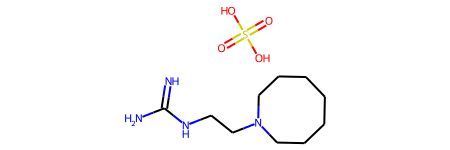

In [653]:
M9 = mol_list [8]
M9

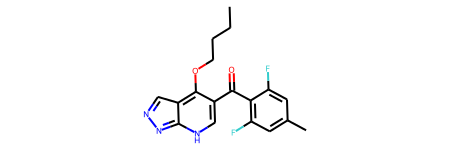

In [654]:
M10= mol_list [9]
M10

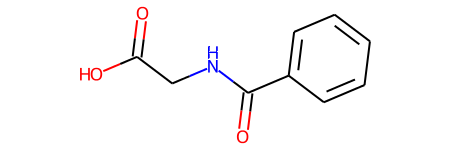

In [655]:
M11= mol_list [10]
M11

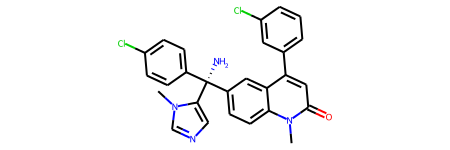

In [656]:
M12= mol_list [11]
M12

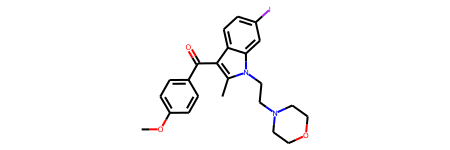

In [657]:
M13= mol_list [12]
M13

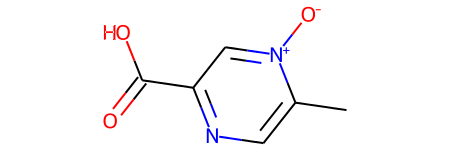

In [658]:
M14= mol_list [13]
M14

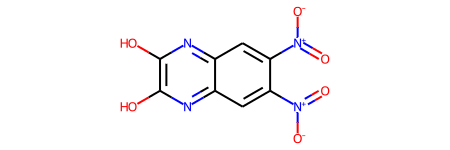

In [659]:
M15= mol_list [14]
M15

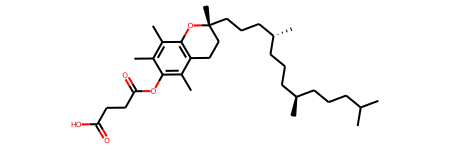

In [660]:
M16= mol_list [15]
M16

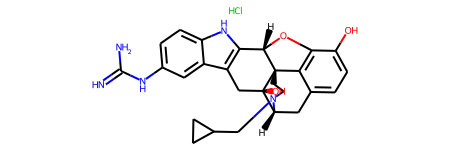

In [661]:
M17= mol_list [16]
M17

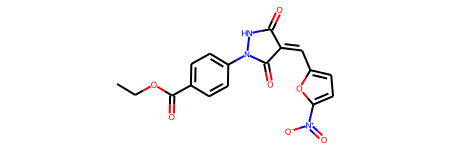

In [662]:
M18= mol_list [17]
M18

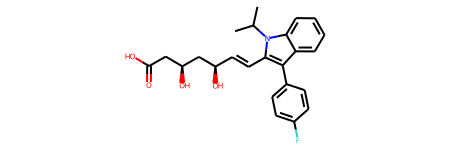

In [663]:
M19= mol_list [18]
M19

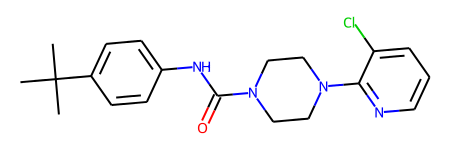

In [664]:
M20= mol_list [19]
M20

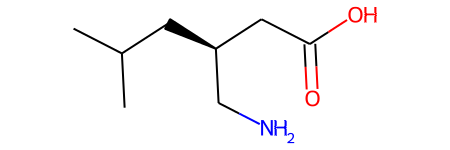

In [665]:
M21= mol_list [20]
M21

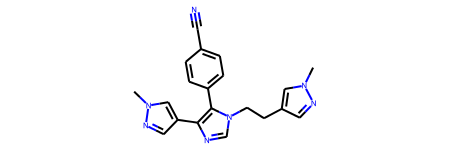

In [666]:
M22= mol_list [21]
M22

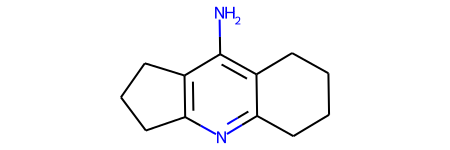

In [667]:
M23= mol_list [22]
M23

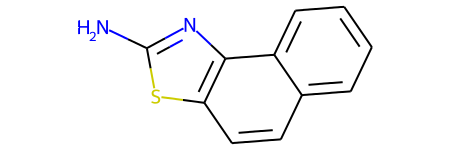

In [668]:
M24= mol_list [23]
M24

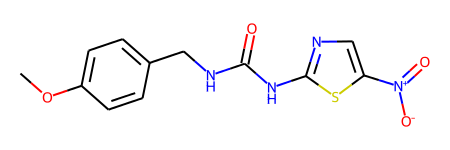

In [669]:
M25= mol_list [24]
M25

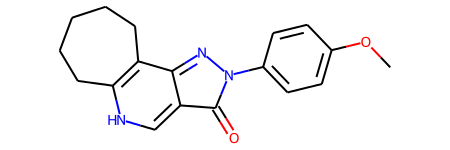

In [670]:
M26= mol_list [25]
M26

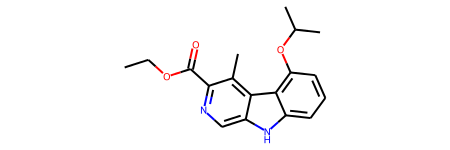

In [671]:
M27= mol_list [26]
M27

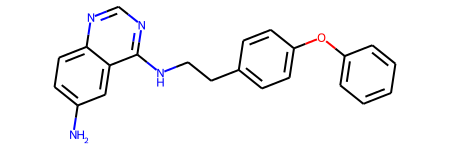

In [672]:
M28= mol_list [27]
M28

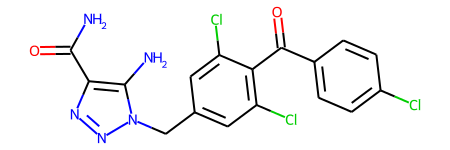

In [673]:
M29= mol_list [28]
M29

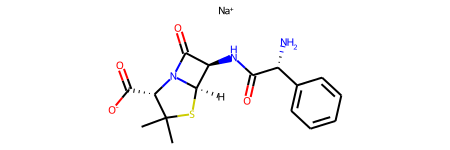

In [674]:
M30= mol_list [29]
M30

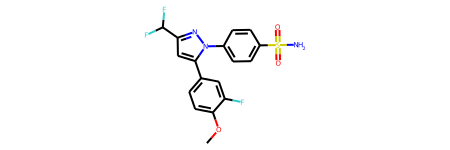

In [675]:
M31= mol_list [30]
M31

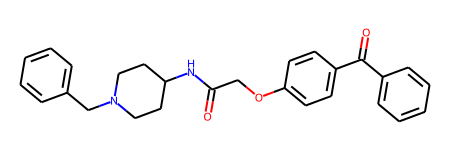

In [676]:
M32= mol_list [31]
M32

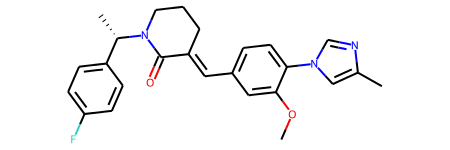

In [677]:
M33= mol_list [32]
M33

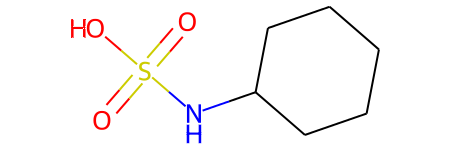

In [678]:
M34= mol_list [33]
M34

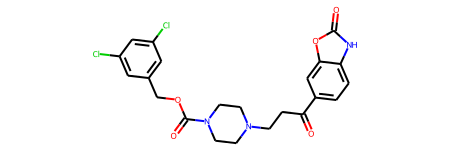

In [679]:
M35= mol_list [34]
M35

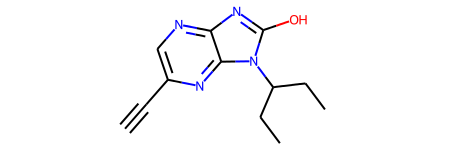

In [680]:
M36= mol_list [35]
M36

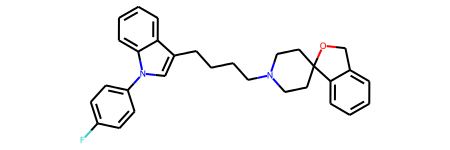

In [681]:
M37= mol_list [36]
M37

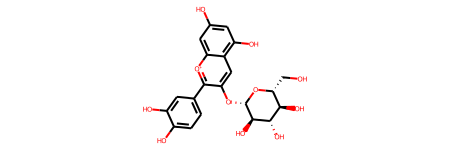

In [682]:
M38= mol_list [37]
M38


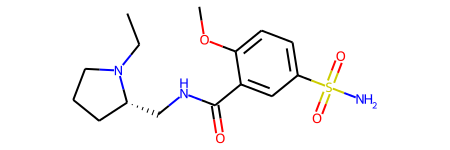

In [683]:
M39= mol_list [38]
M39

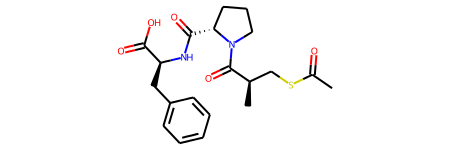

In [684]:
M40= mol_list [39]
M40

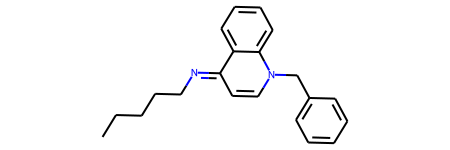

In [685]:
M41= mol_list [40]
M41

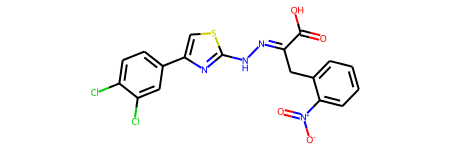

In [686]:
M42= mol_list [41]
M42

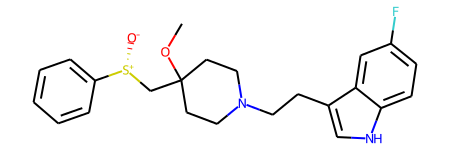

In [687]:
M43= mol_list [42]
M43

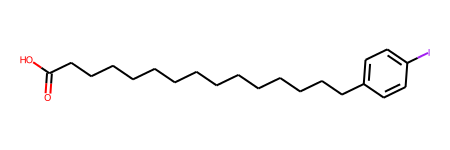

In [688]:
M44= mol_list [43]
M44

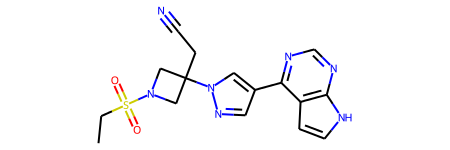

In [689]:
M45= mol_list [44]
M45

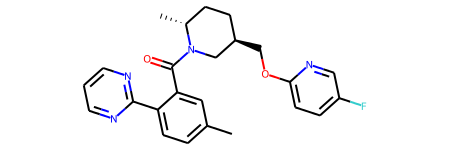

In [690]:
M46= mol_list [45]
M46

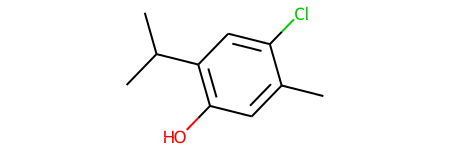

In [691]:
M47= mol_list [46]
M47

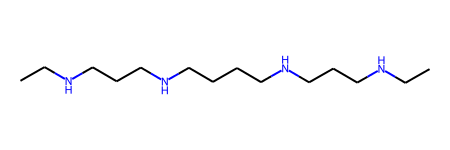

In [692]:
M48= mol_list [47]
M48

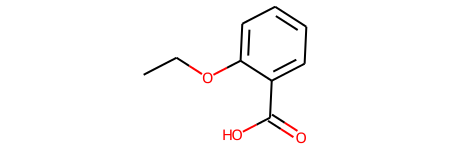

In [693]:
M49= mol_list [48]
M49

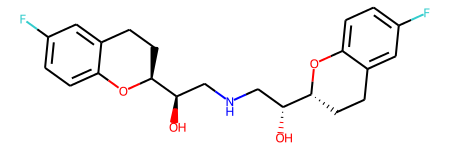

In [694]:
M50= mol_list [49]
M50

In [695]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[33,
 36,
 37,
 61,
 80,
 84,
 106,
 113,
 129,
 147,
 170,
 175,
 182,
 233,
 250,
 264,
 268,
 285,
 294,
 301,
 314,
 356,
 362,
 404,
 412,
 414,
 424,
 450,
 504,
 519,
 532,
 534,
 547,
 600,
 611,
 631,
 639,
 650,
 659,
 679,
 687,
 693,
 695,
 711,
 714,
 760,
 767,
 787,
 807,
 826,
 849,
 866,
 893,
 898,
 926,
 942,
 951,
 967,
 973,
 980,
 997,
 1002,
 1019]

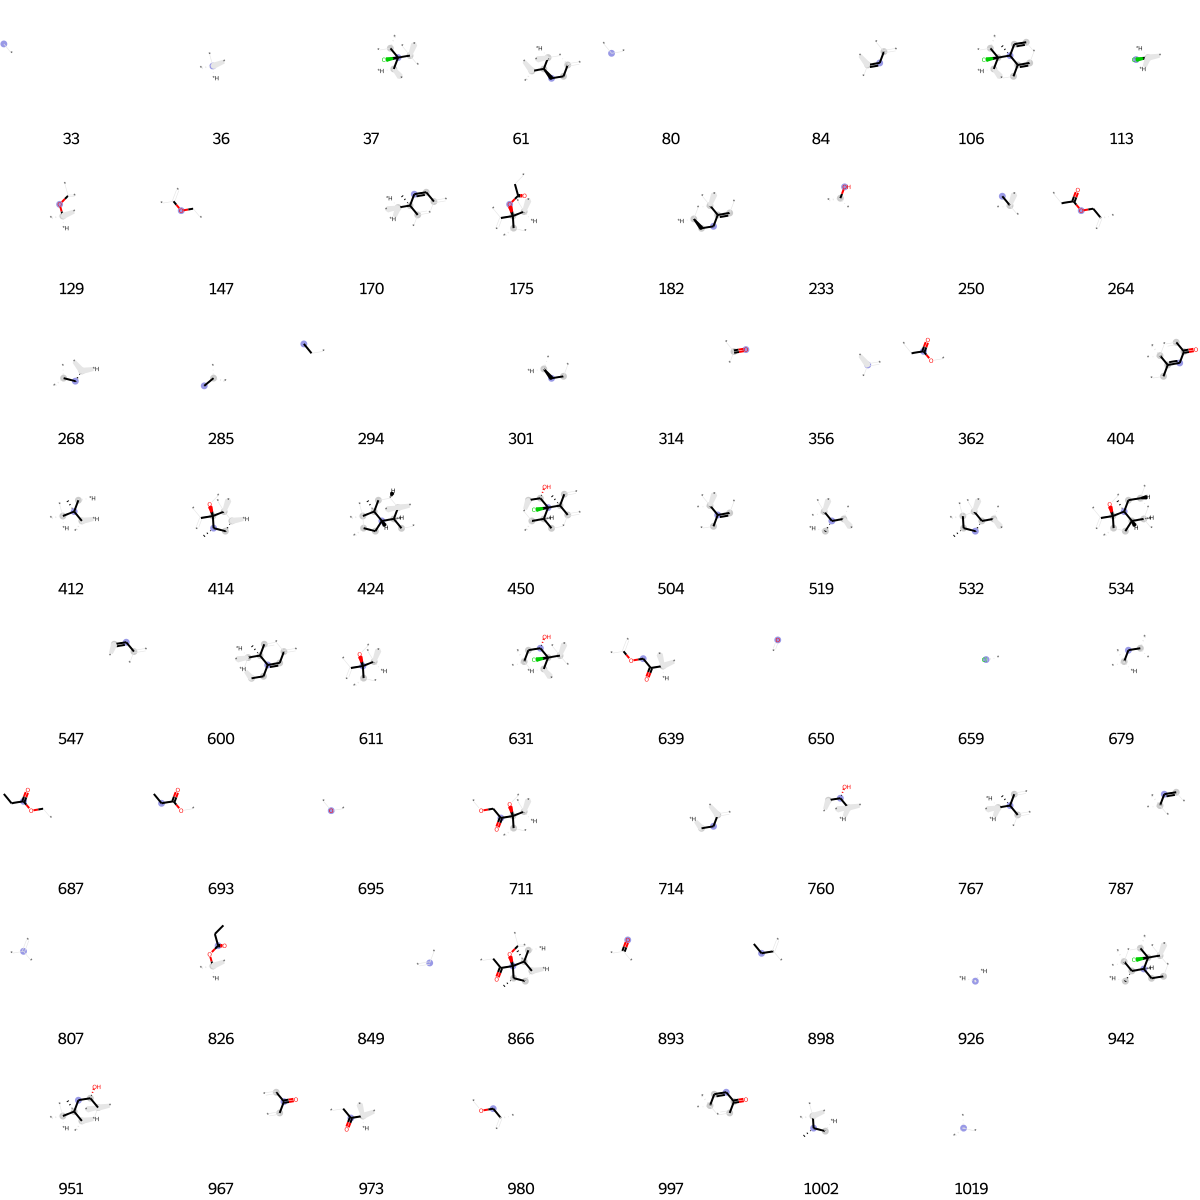

In [696]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [697]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[33,
 36,
 37,
 61,
 80,
 84,
 106,
 113,
 129,
 147,
 170,
 175,
 182,
 233,
 250,
 264,
 268,
 285,
 294,
 301,
 314,
 356,
 362,
 404,
 412,
 414,
 424,
 450,
 504,
 519,
 532,
 534,
 547,
 600,
 611,
 631,
 639,
 650,
 659,
 679,
 687,
 693,
 695,
 711,
 714,
 760,
 767,
 787,
 807,
 826,
 849,
 866,
 893,
 898,
 926,
 942,
 951,
 967,
 973,
 980,
 997,
 1002,
 1019]

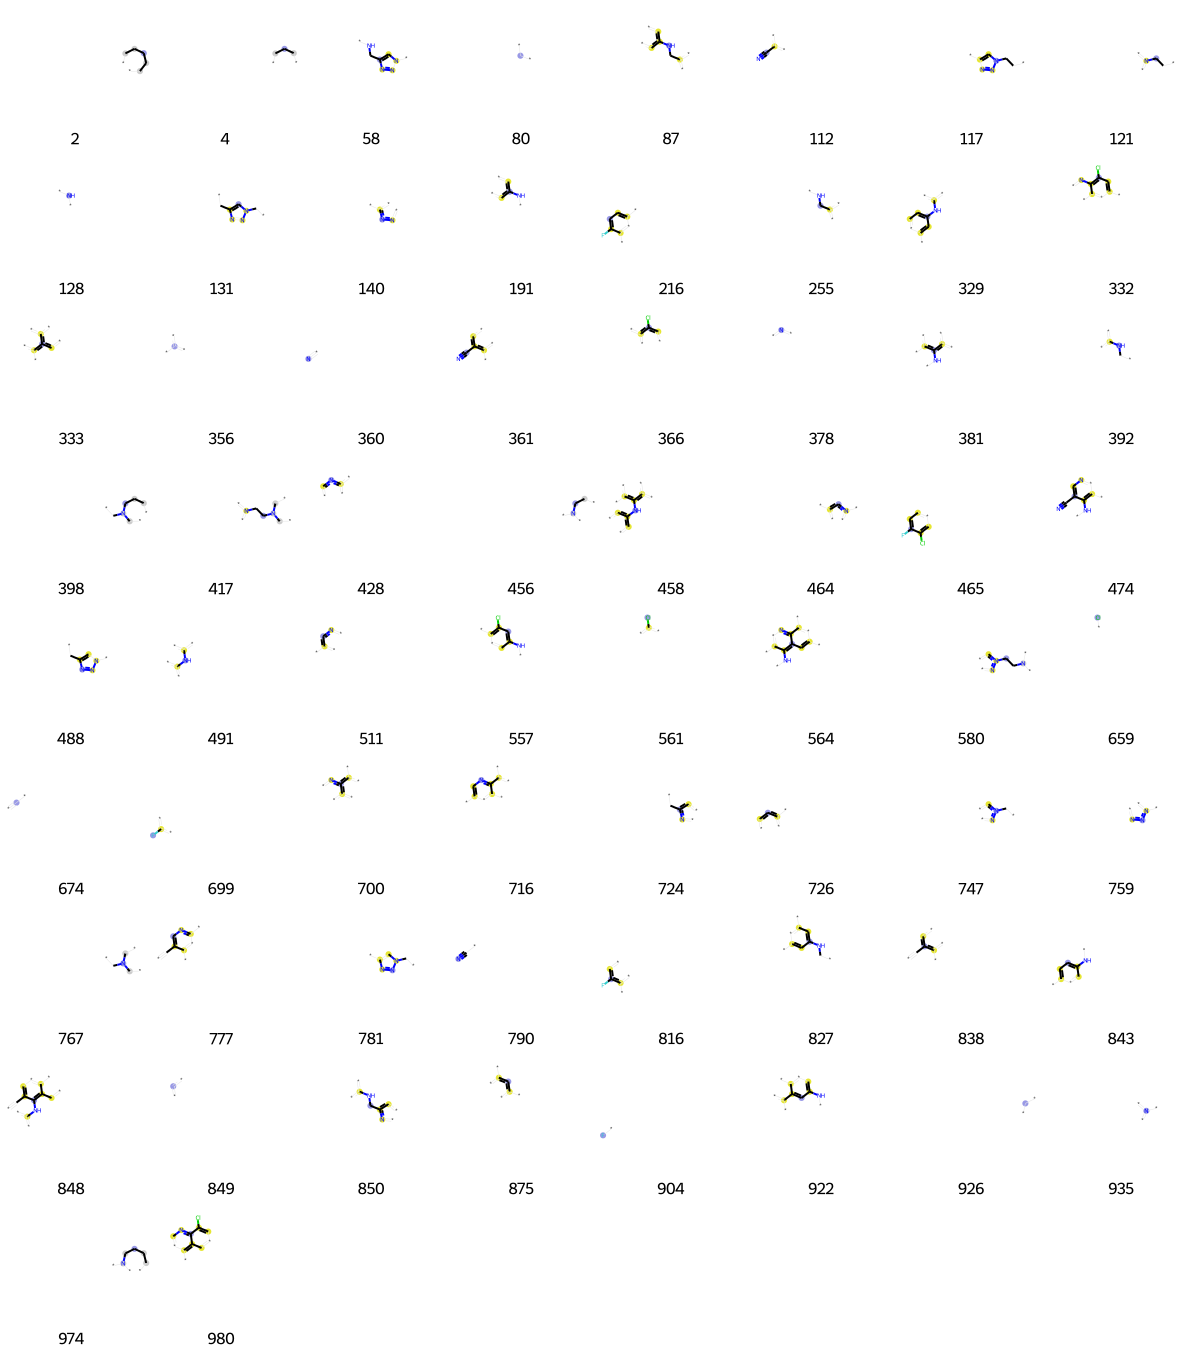

In [698]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [699]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[33,
 36,
 74,
 90,
 97,
 112,
 121,
 124,
 136,
 232,
 250,
 254,
 258,
 305,
 324,
 356,
 358,
 360,
 372,
 390,
 564,
 602,
 644,
 656,
 668,
 674,
 682,
 693,
 726,
 750,
 790,
 849,
 867,
 875,
 896,
 928,
 935,
 956,
 958,
 980,
 1023]

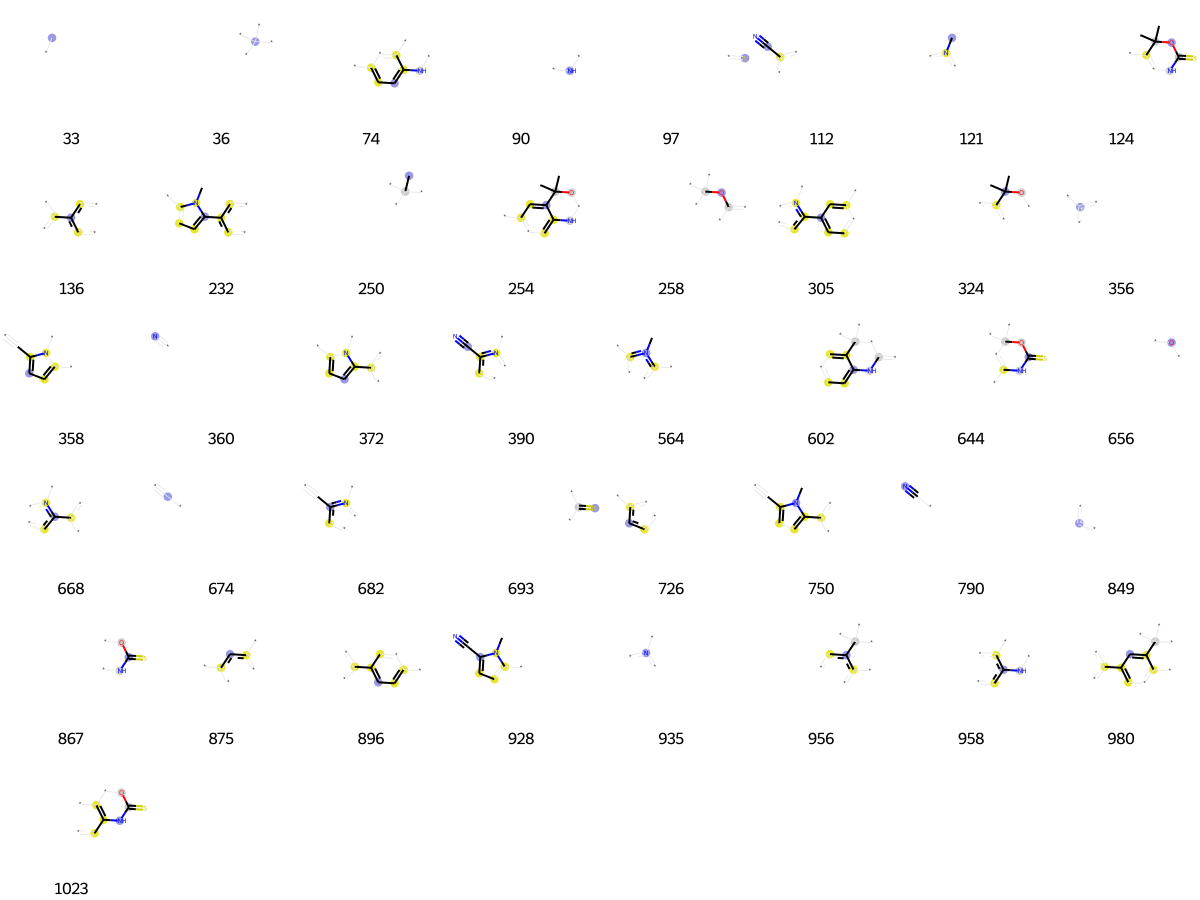

In [700]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [704]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[33,
 36,
 54,
 64,
 77,
 85,
 90,
 95,
 96,
 107,
 121,
 136,
 175,
 202,
 265,
 281,
 310,
 314,
 352,
 356,
 385,
 388,
 472,
 474,
 633,
 650,
 694,
 726,
 825,
 834,
 849,
 935,
 984]

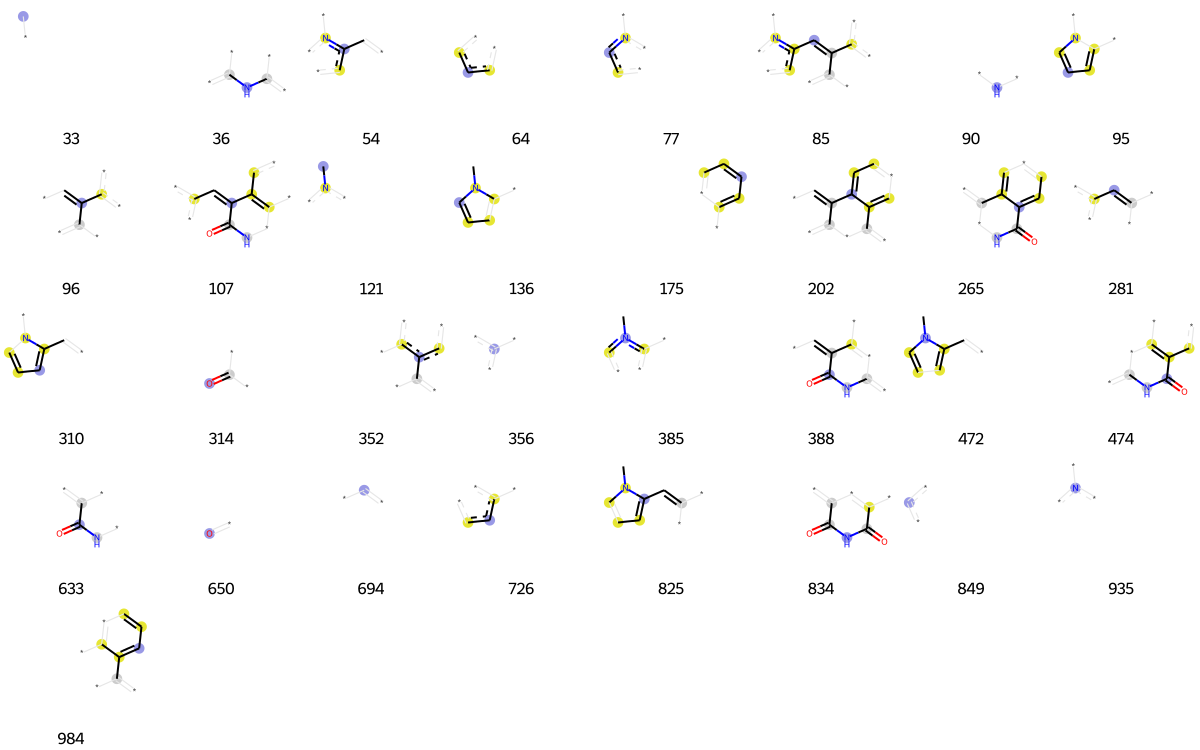

In [705]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [706]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[2,
 25,
 31,
 33,
 67,
 74,
 80,
 90,
 96,
 119,
 123,
 232,
 253,
 284,
 294,
 300,
 356,
 361,
 366,
 378,
 386,
 389,
 434,
 463,
 508,
 511,
 561,
 599,
 600,
 609,
 636,
 646,
 650,
 659,
 673,
 688,
 694,
 699,
 726,
 804,
 807,
 831,
 835,
 849,
 875,
 878,
 893,
 898,
 899,
 904,
 915,
 924,
 926,
 967,
 970,
 976,
 1009]

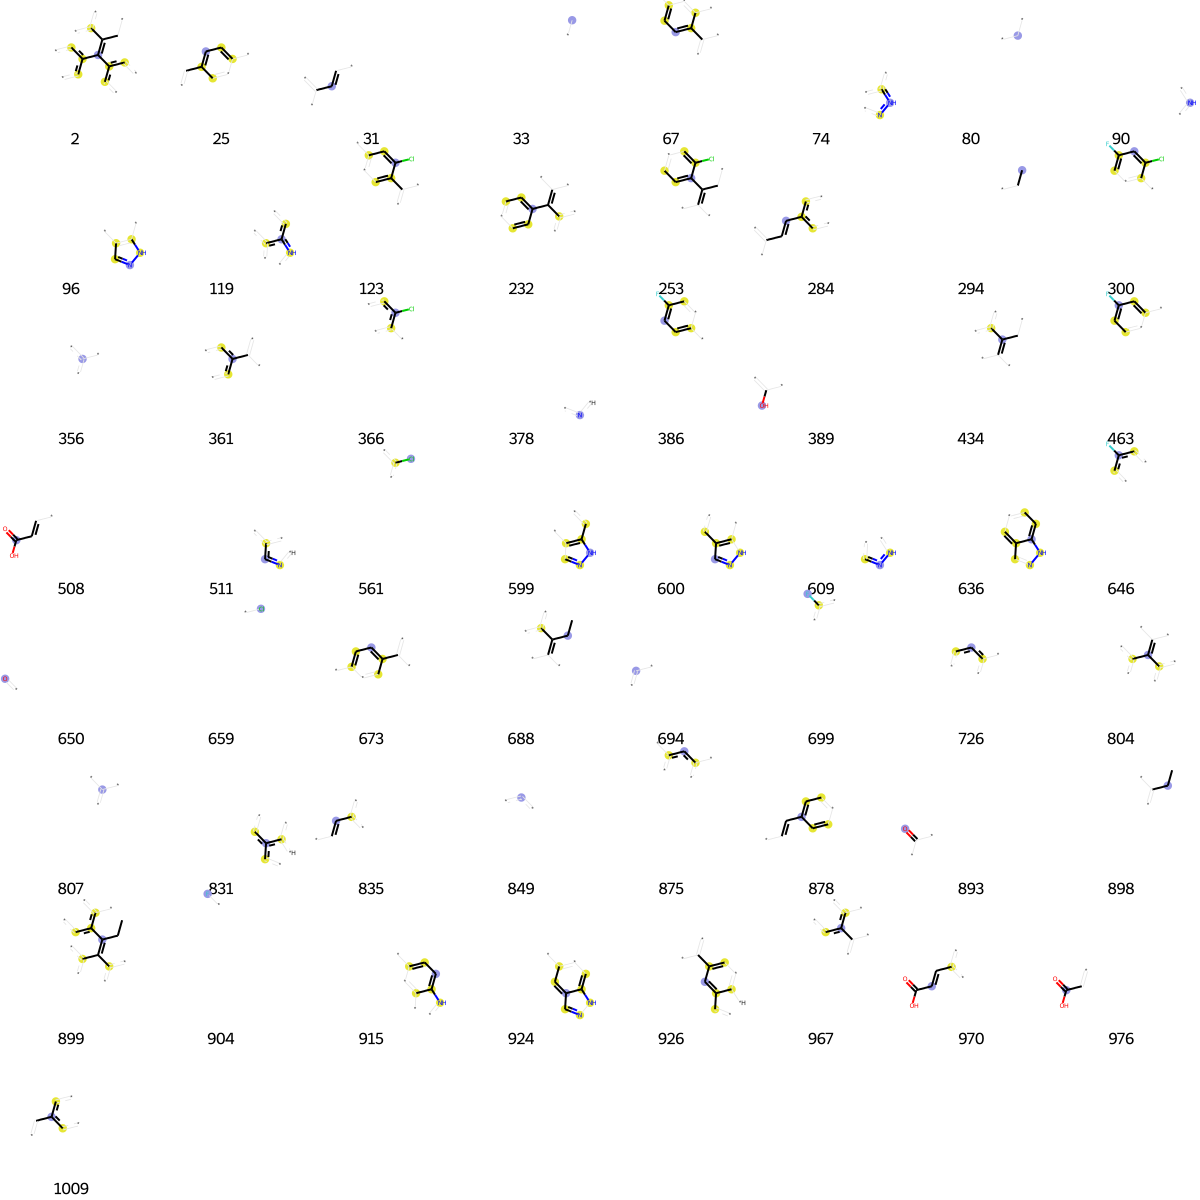

In [707]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [708]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[1,
 80,
 147,
 263,
 389,
 403,
 540,
 650,
 713,
 739,
 767,
 786,
 807,
 820,
 825,
 893,
 900,
 955]

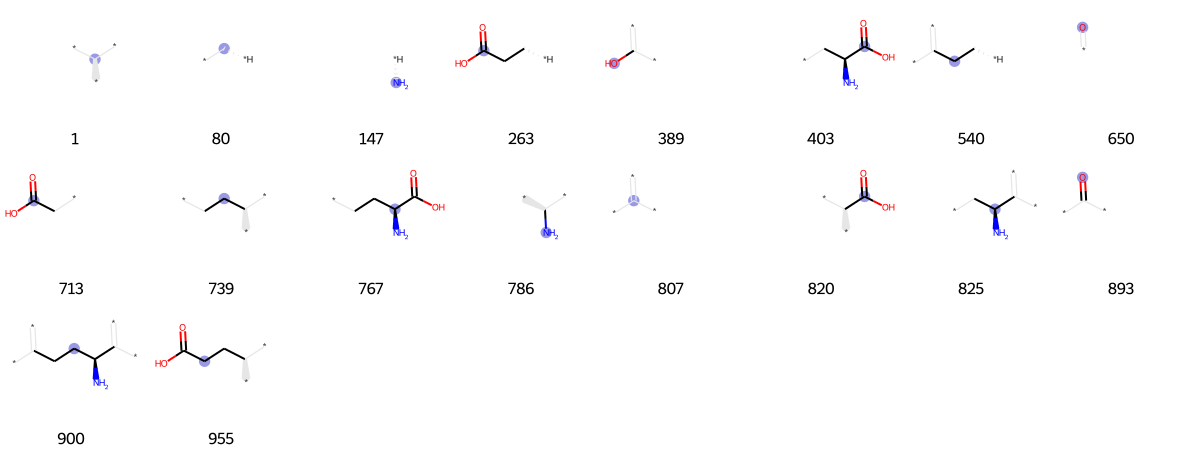

In [709]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [710]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[15,
 23,
 63,
 64,
 73,
 80,
 94,
 128,
 175,
 191,
 200,
 203,
 225,
 289,
 322,
 329,
 350,
 356,
 378,
 386,
 389,
 423,
 428,
 444,
 456,
 477,
 491,
 562,
 650,
 654,
 672,
 695,
 703,
 724,
 726,
 745,
 807,
 819,
 831,
 849,
 875,
 876,
 882,
 893,
 927,
 950,
 967]

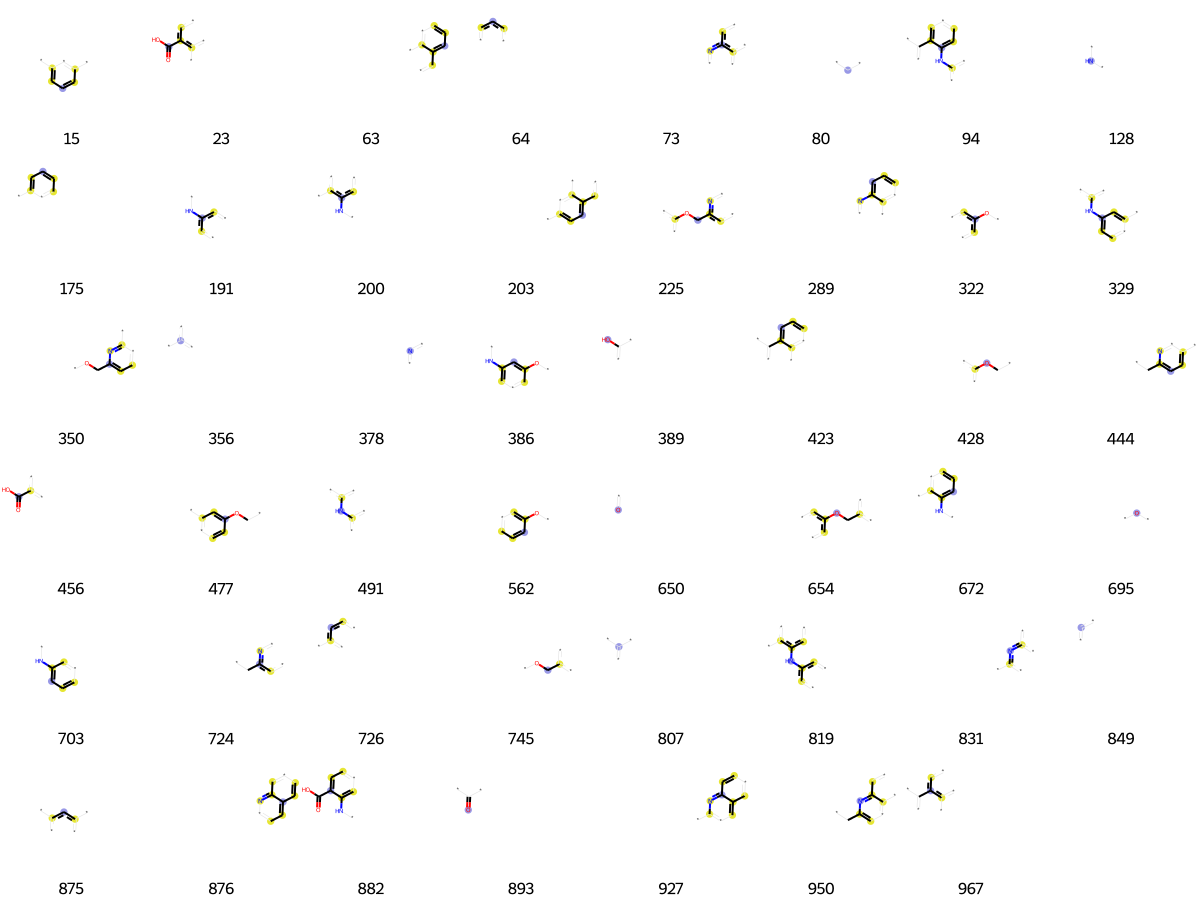

In [711]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])

In [712]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[2,
 4,
 80,
 121,
 128,
 140,
 147,
 197,
 350,
 398,
 427,
 452,
 456,
 458,
 586,
 592,
 623,
 650,
 667,
 714,
 767,
 807,
 882,
 894,
 926,
 935,
 974,
 983]

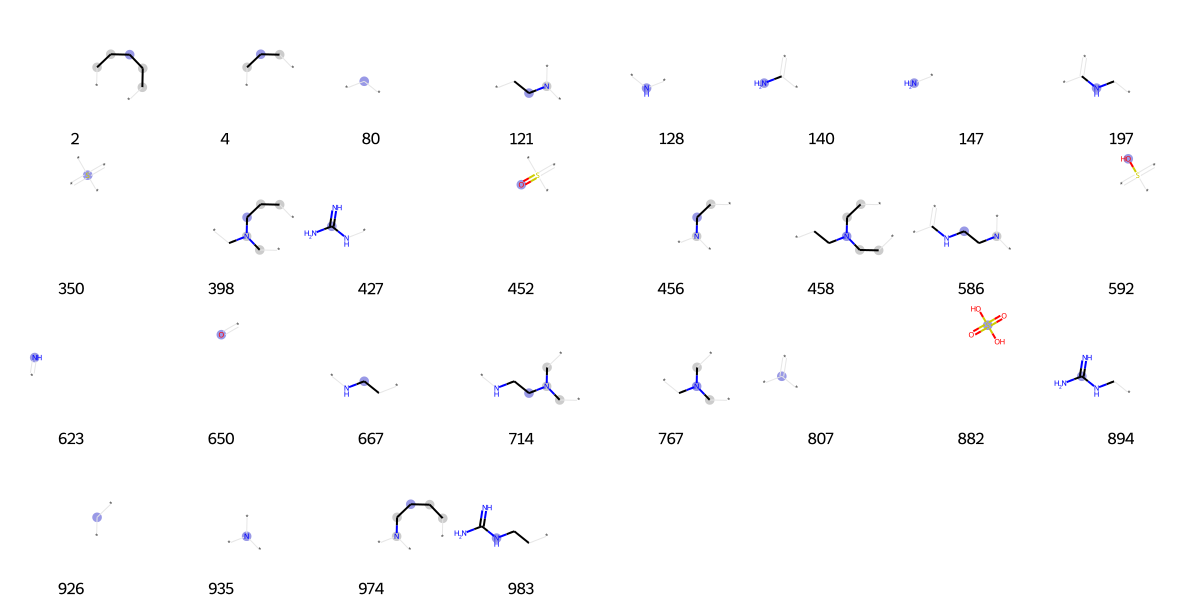

In [713]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [714]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[9,
 13,
 20,
 25,
 33,
 61,
 80,
 90,
 140,
 205,
 281,
 294,
 328,
 333,
 352,
 356,
 378,
 428,
 463,
 497,
 511,
 518,
 551,
 585,
 586,
 591,
 606,
 650,
 695,
 698,
 699,
 704,
 718,
 723,
 794,
 799,
 806,
 807,
 816,
 849,
 855,
 875,
 878,
 887,
 893,
 904,
 929,
 967,
 986]

In [716]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[64,
 80,
 128,
 175,
 197,
 265,
 339,
 356,
 361,
 389,
 390,
 416,
 486,
 524,
 641,
 650,
 713,
 726,
 807,
 849,
 893,
 961]

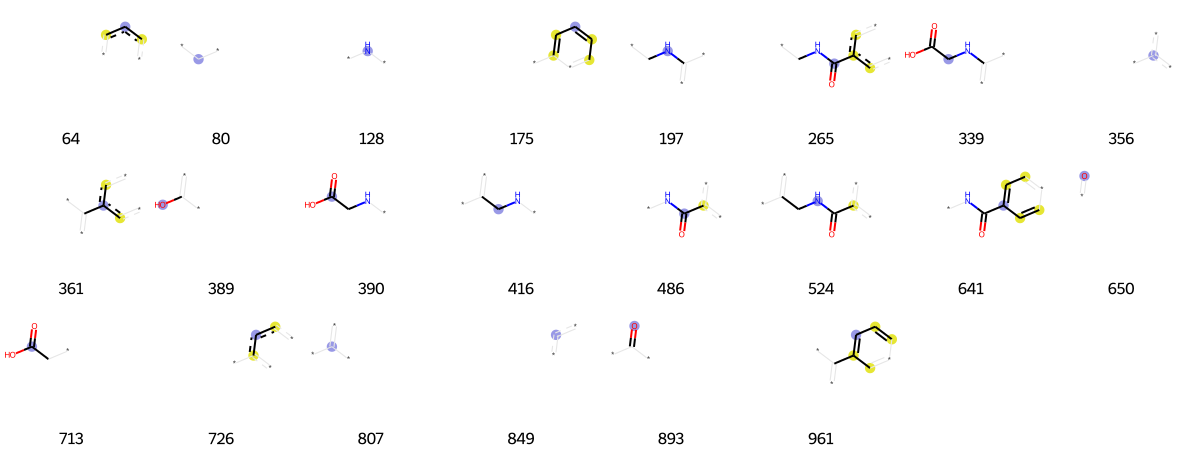

In [717]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [718]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[10,
 15,
 33,
 45,
 46,
 54,
 64,
 114,
 117,
 121,
 135,
 136,
 139,
 147,
 165,
 216,
 242,
 252,
 314,
 323,
 326,
 333,
 352,
 356,
 378,
 385,
 393,
 419,
 452,
 511,
 526,
 559,
 561,
 564,
 579,
 592,
 641,
 650,
 659,
 675,
 702,
 707,
 726,
 729,
 736,
 816,
 843,
 849,
 855,
 875,
 900,
 932,
 935,
 997]

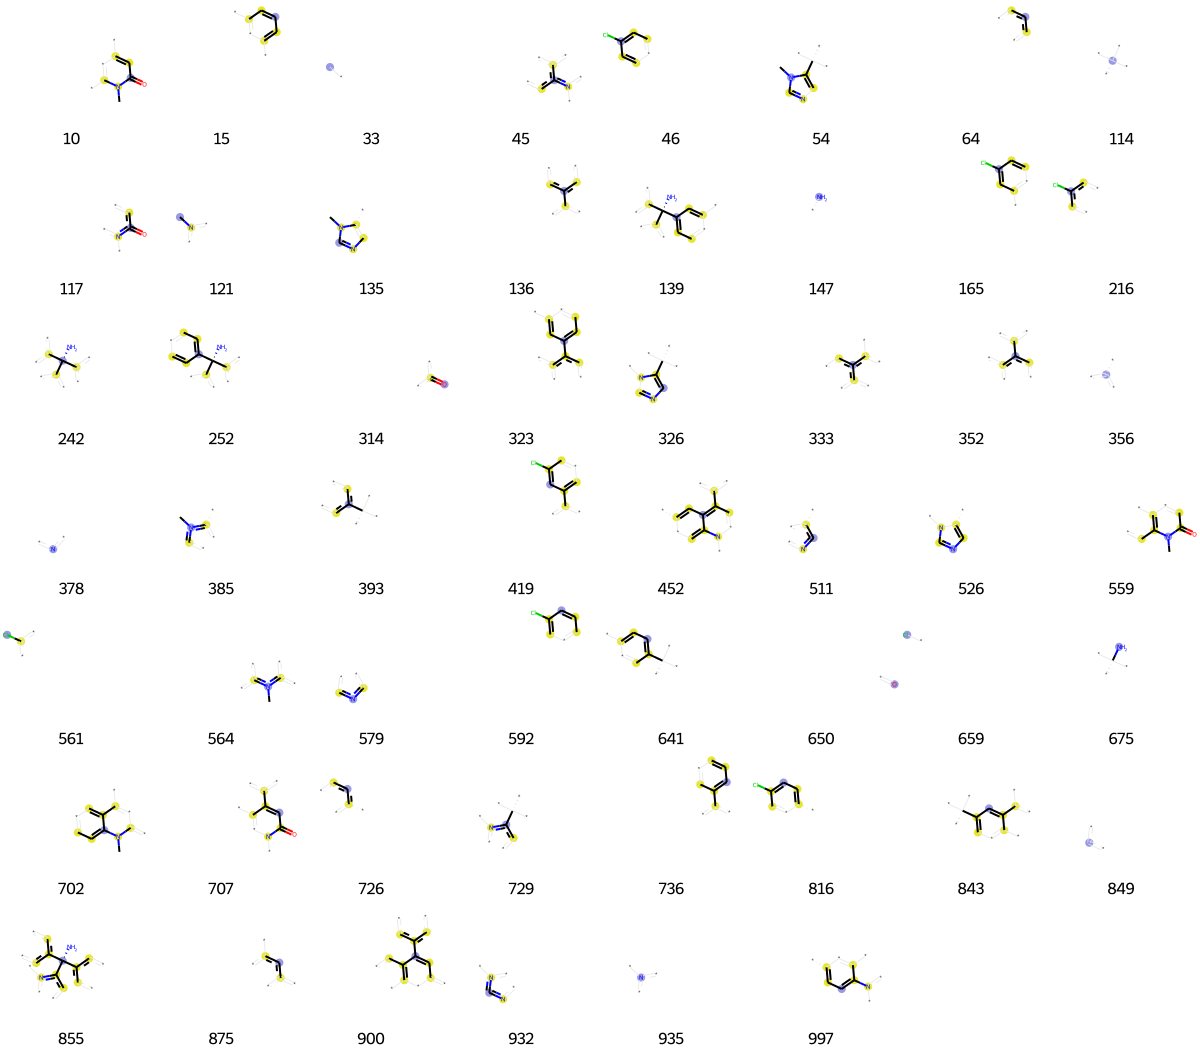

In [719]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [720]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[9,
 33,
 35,
 45,
 80,
 121,
 122,
 146,
 322,
 333,
 356,
 361,
 381,
 417,
 456,
 458,
 470,
 512,
 523,
 570,
 575,
 586,
 616,
 650,
 656,
 661,
 673,
 695,
 698,
 709,
 718,
 726,
 742,
 751,
 767,
 781,
 802,
 807,
 819,
 825,
 831,
 841,
 849,
 875,
 893,
 926,
 935,
 947,
 950]

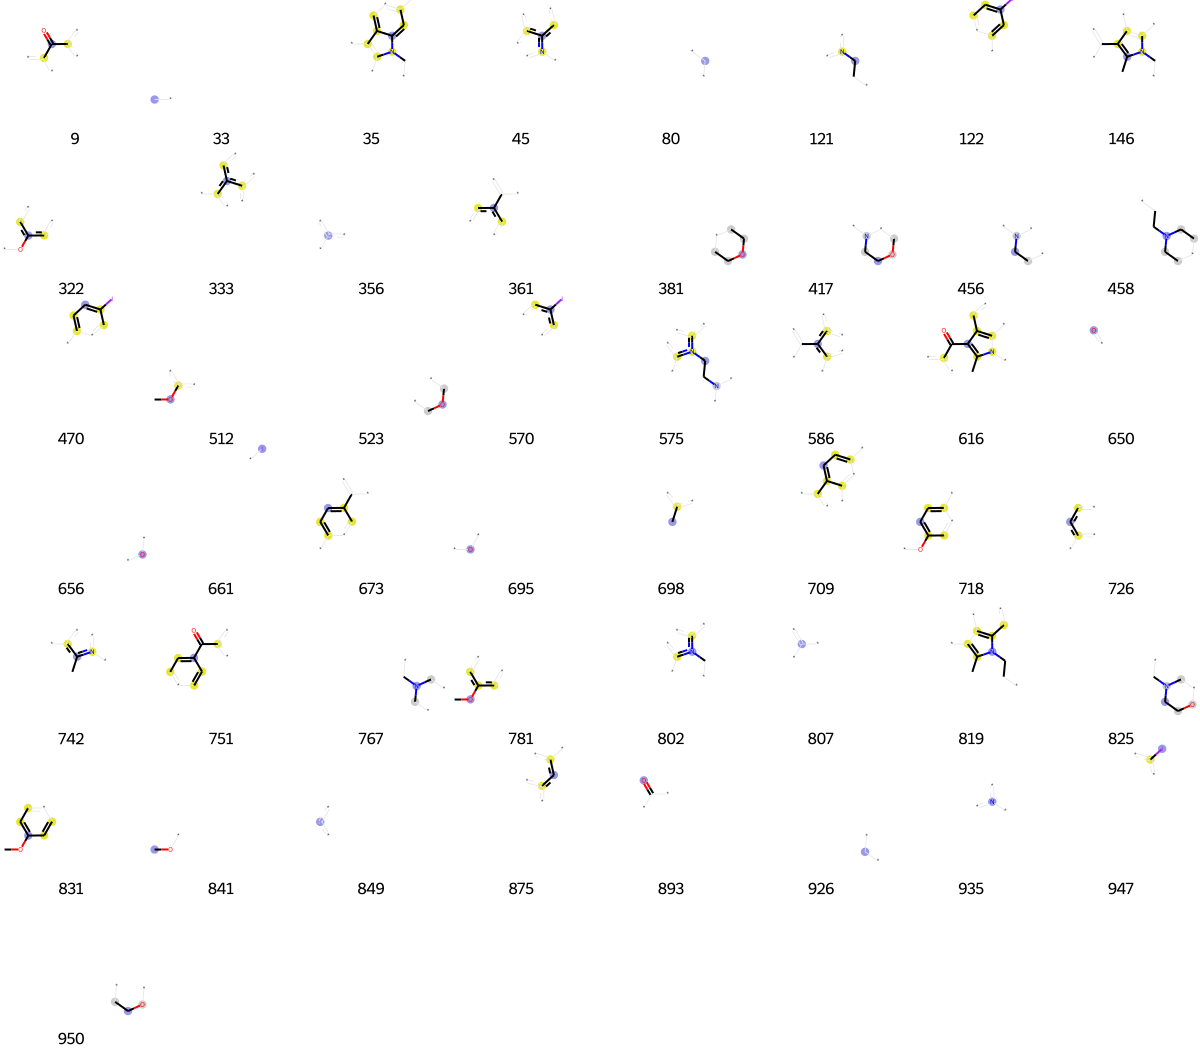

In [721]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [722]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[33,
 121,
 148,
 177,
 290,
 350,
 356,
 378,
 389,
 428,
 456,
 459,
 463,
 511,
 650,
 693,
 698,
 715,
 807,
 845,
 849,
 855,
 871,
 893,
 957,
 1015]

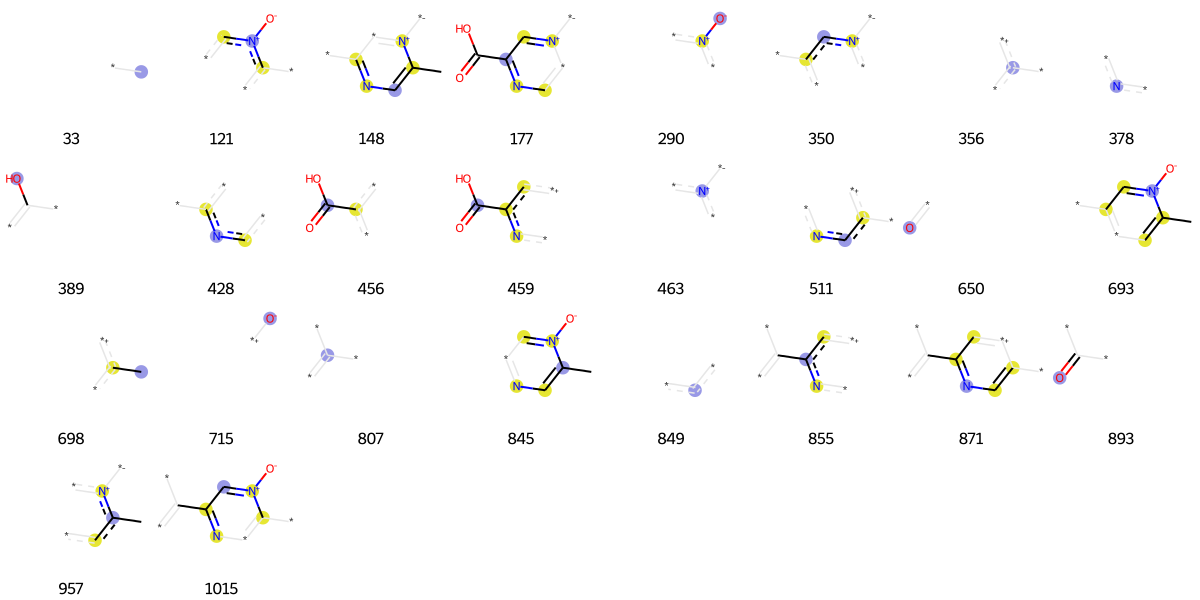

In [723]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [724]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[26,
 73,
 87,
 106,
 171,
 342,
 354,
 356,
 378,
 431,
 438,
 578,
 650,
 715,
 716,
 753,
 807,
 831,
 838,
 849,
 875,
 939]

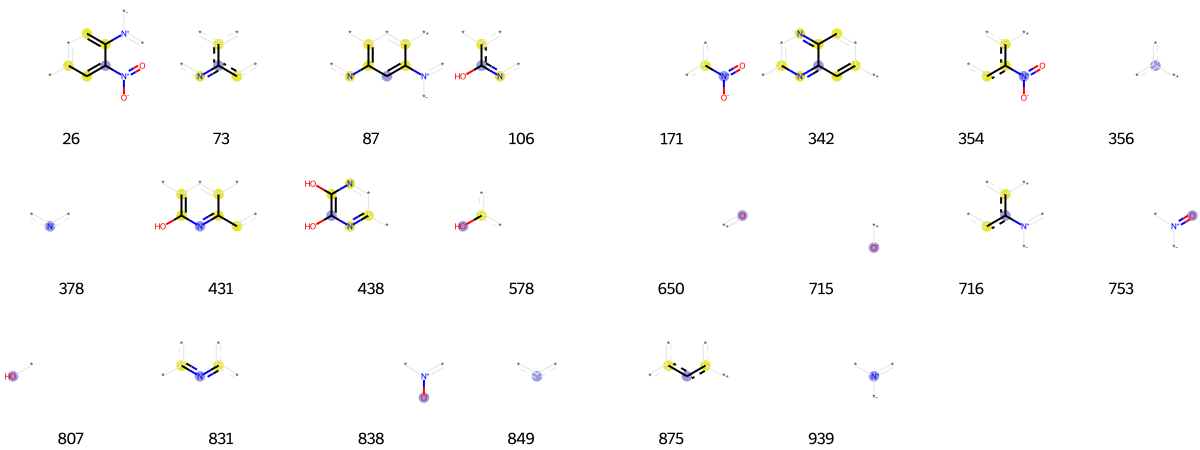

In [725]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [726]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[1,
 14,
 33,
 36,
 80,
 118,
 138,
 146,
 170,
 185,
 232,
 250,
 252,
 258,
 262,
 263,
 270,
 283,
 333,
 356,
 361,
 362,
 389,
 399,
 406,
 441,
 489,
 540,
 599,
 650,
 656,
 672,
 695,
 698,
 701,
 705,
 713,
 714,
 739,
 740,
 741,
 755,
 764,
 795,
 807,
 823,
 836,
 856,
 887,
 893,
 895,
 926]

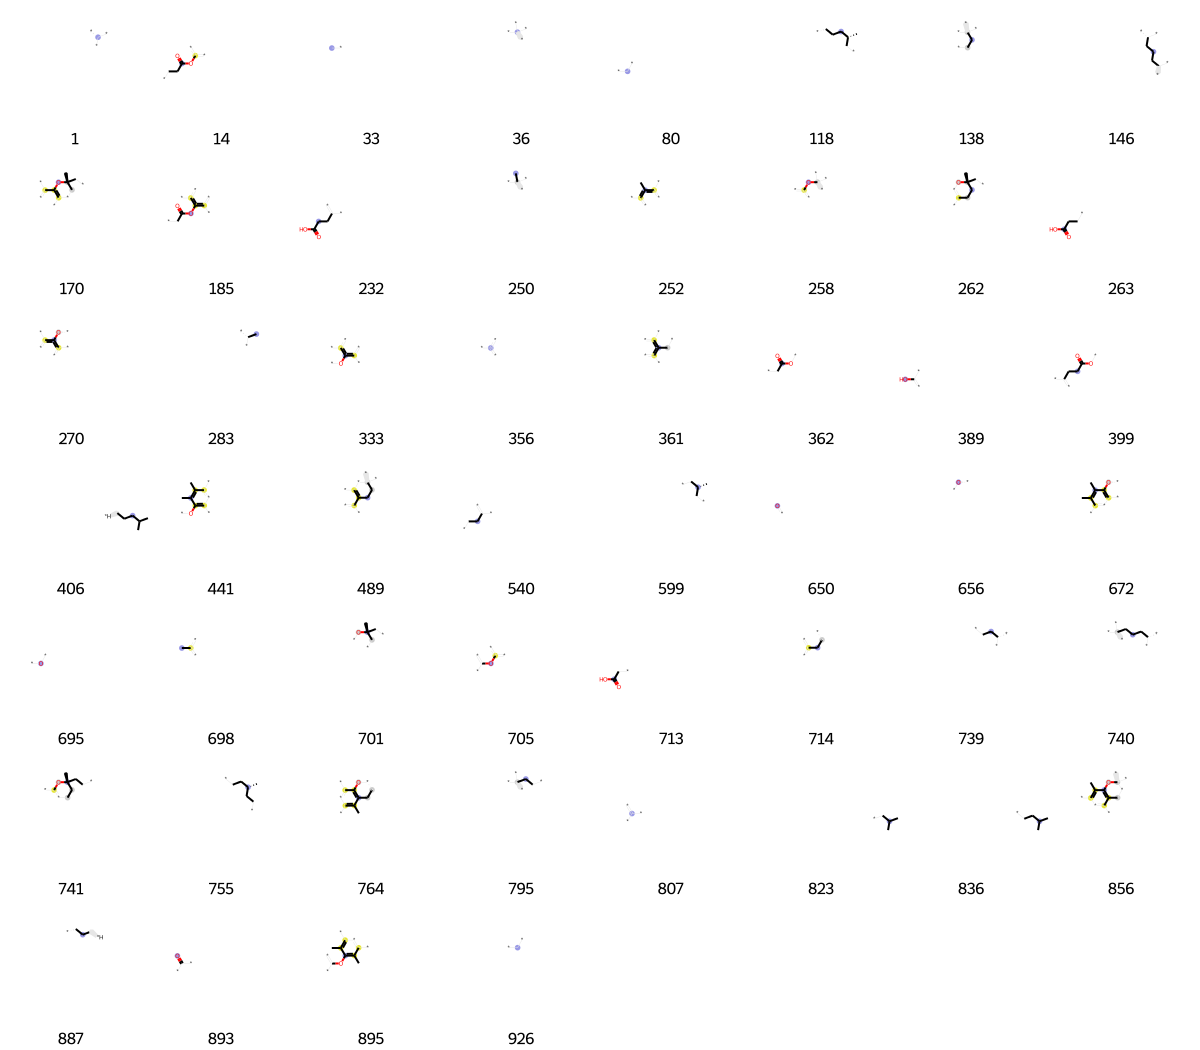

In [727]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [728]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[15,
 29,
 36,
 74,
 80,
 90,
 119,
 128,
 130,
 138,
 140,
 147,
 150,
 184,
 191,
 212,
 214,
 231,
 233,
 248,
 264,
 270,
 275,
 301,
 311,
 324,
 333,
 356,
 361,
 389,
 427,
 451,
 456,
 470,
 474,
 487,
 514,
 556,
 578,
 583,
 623,
 632,
 647,
 649,
 656,
 682,
 721,
 726,
 736,
 737,
 750,
 784,
 791,
 792,
 807,
 843,
 849,
 875,
 889,
 908,
 915,
 922,
 926,
 935,
 940,
 948,
 956,
 998,
 1019,
 1021]

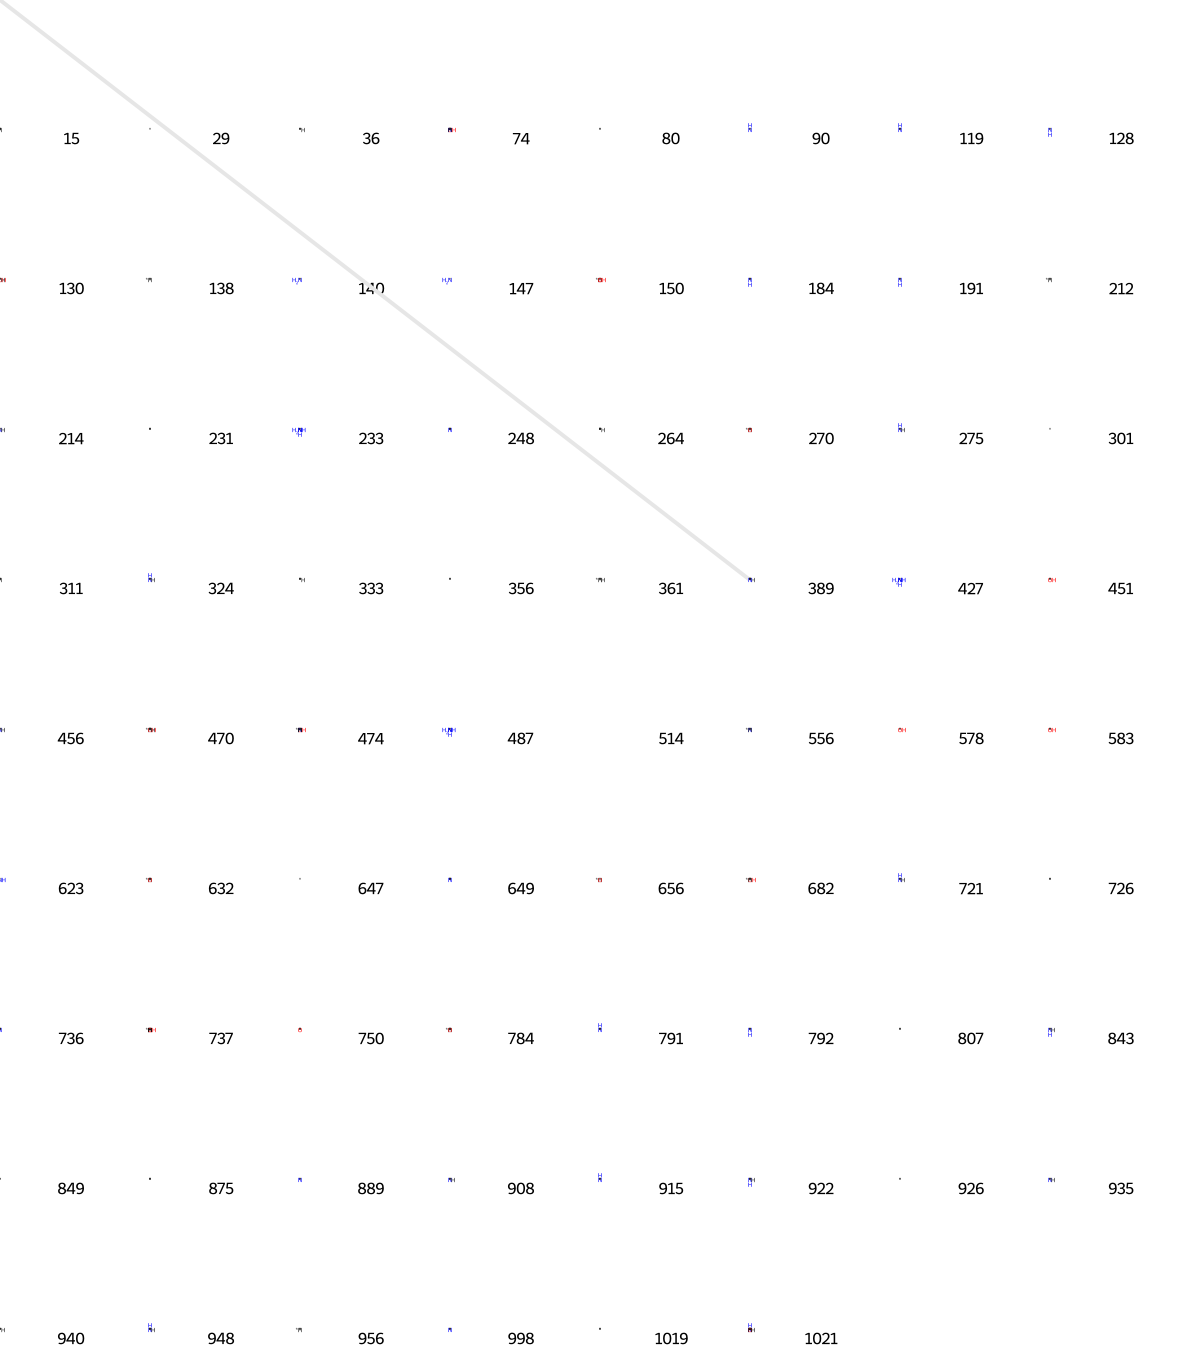

In [729]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [730]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[4,
 11,
 32,
 33,
 45,
 80,
 90,
 96,
 145,
 147,
 171,
 192,
 198,
 202,
 214,
 233,
 255,
 270,
 281,
 294,
 314,
 356,
 361,
 394,
 498,
 525,
 577,
 580,
 606,
 631,
 633,
 640,
 650,
 656,
 673,
 694,
 695,
 698,
 715,
 726,
 753,
 759,
 770,
 796,
 801,
 807,
 838,
 849,
 879,
 893,
 935,
 939,
 951]

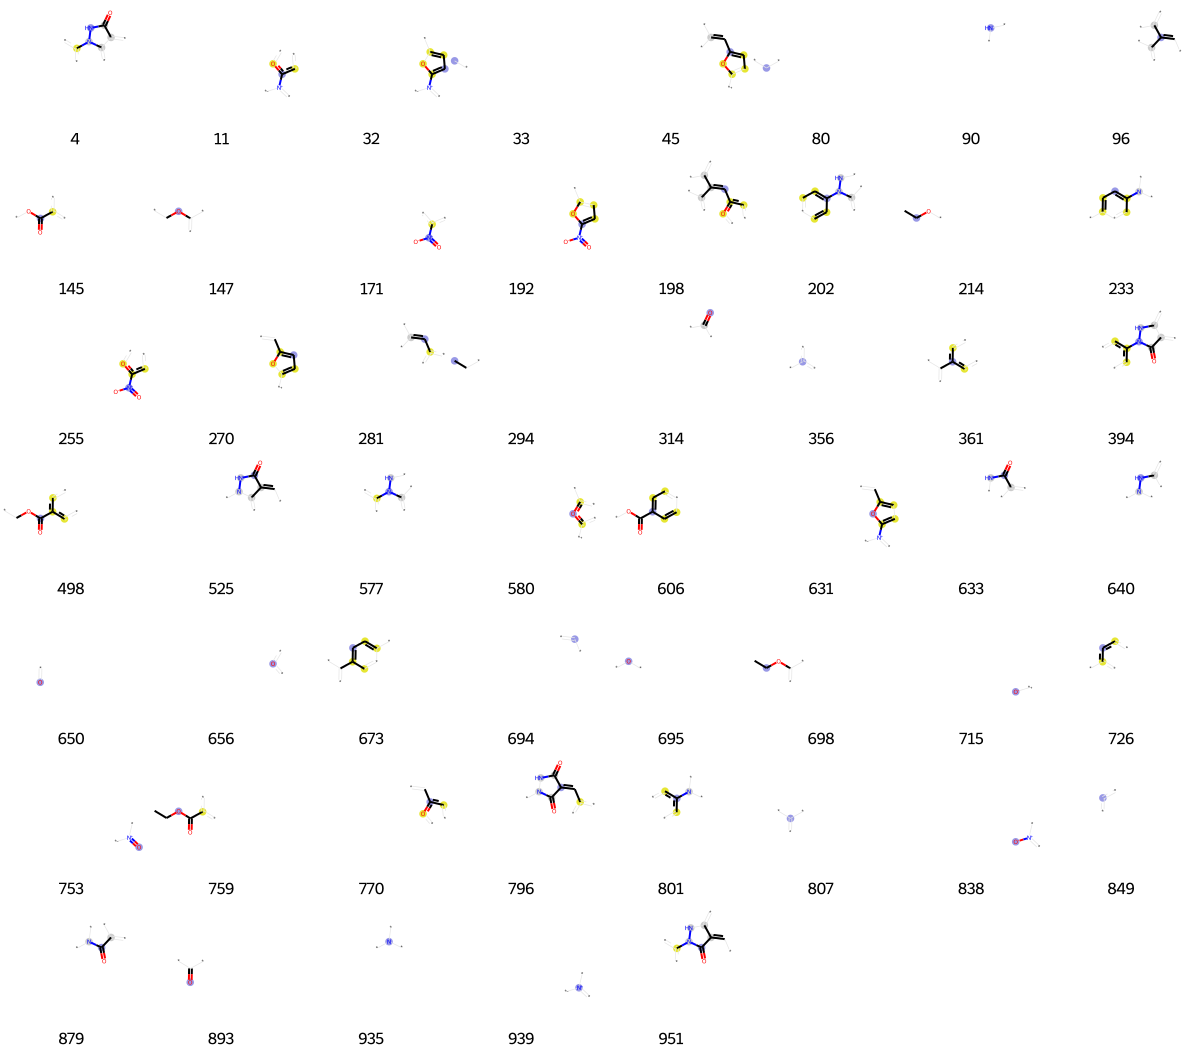

In [731]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [732]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[1,
 25,
 33,
 45,
 64,
 80,
 90,
 117,
 136,
 157,
 169,
 175,
 227,
 239,
 261,
 266,
 283,
 303,
 333,
 356,
 384,
 386,
 389,
 486,
 540,
 549,
 600,
 612,
 624,
 646,
 648,
 650,
 677,
 680,
 694,
 699,
 713,
 723,
 726,
 807,
 835,
 849,
 862,
 893,
 896,
 904,
 906,
 935,
 965,
 1014]

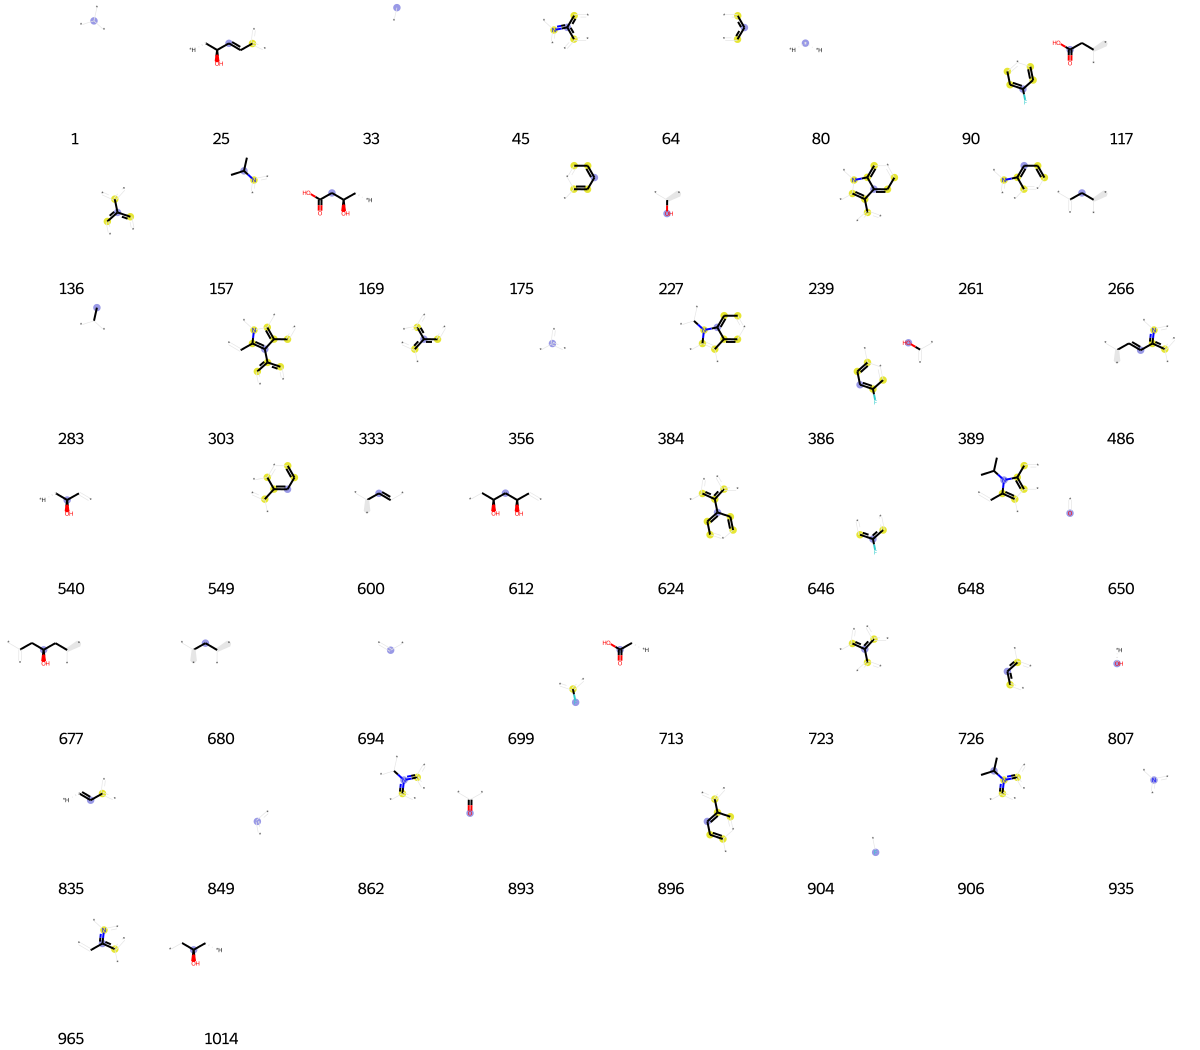

In [733]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [734]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[19,
 33,
 53,
 64,
 102,
 114,
 128,
 130,
 191,
 218,
 315,
 356,
 357,
 366,
 375,
 378,
 392,
 393,
 407,
 426,
 428,
 444,
 448,
 456,
 484,
 532,
 561,
 565,
 641,
 650,
 659,
 726,
 792,
 807,
 842,
 843,
 849,
 893,
 926,
 935,
 974,
 985]

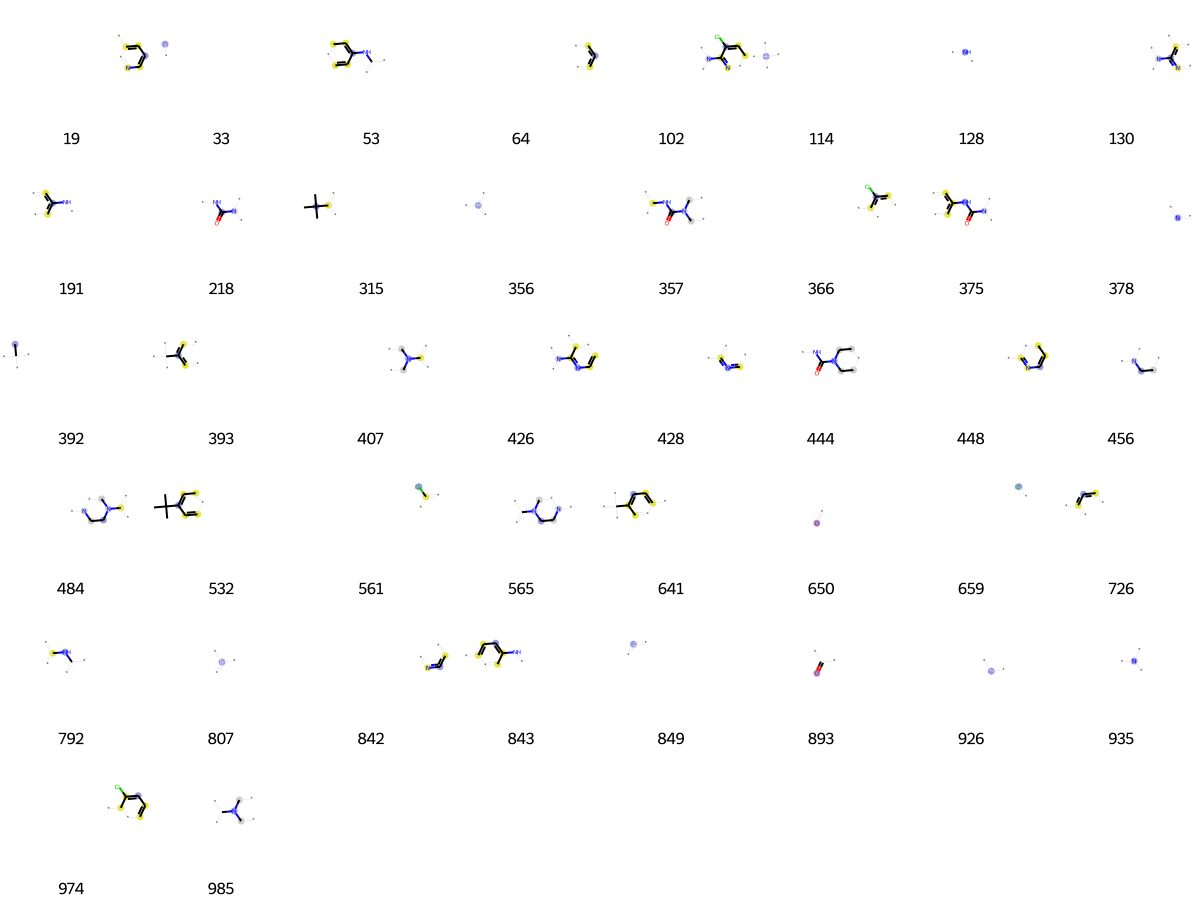

In [735]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [736]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[1,
 33,
 80,
 117,
 147,
 158,
 266,
 283,
 389,
 396,
 547,
 650,
 680,
 699,
 713,
 759,
 807,
 823,
 885,
 893,
 970,
 981]

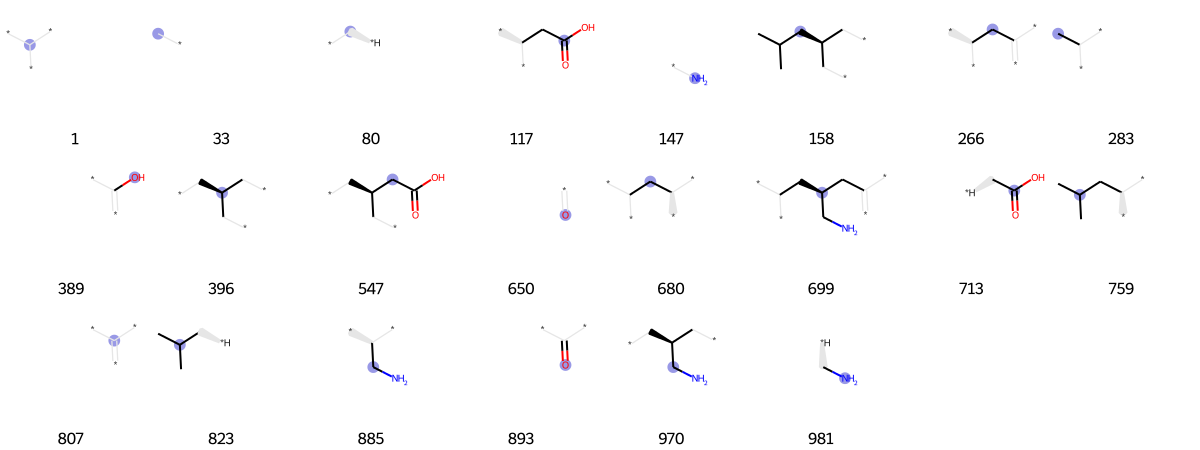

In [737]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [738]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[33,
 34,
 43,
 80,
 102,
 112,
 121,
 136,
 159,
 204,
 219,
 275,
 279,
 289,
 305,
 323,
 327,
 351,
 356,
 360,
 378,
 428,
 431,
 464,
 511,
 650,
 674,
 703,
 726,
 730,
 738,
 774,
 784,
 790,
 833,
 849,
 852,
 873,
 896,
 926,
 930,
 932,
 935,
 965]

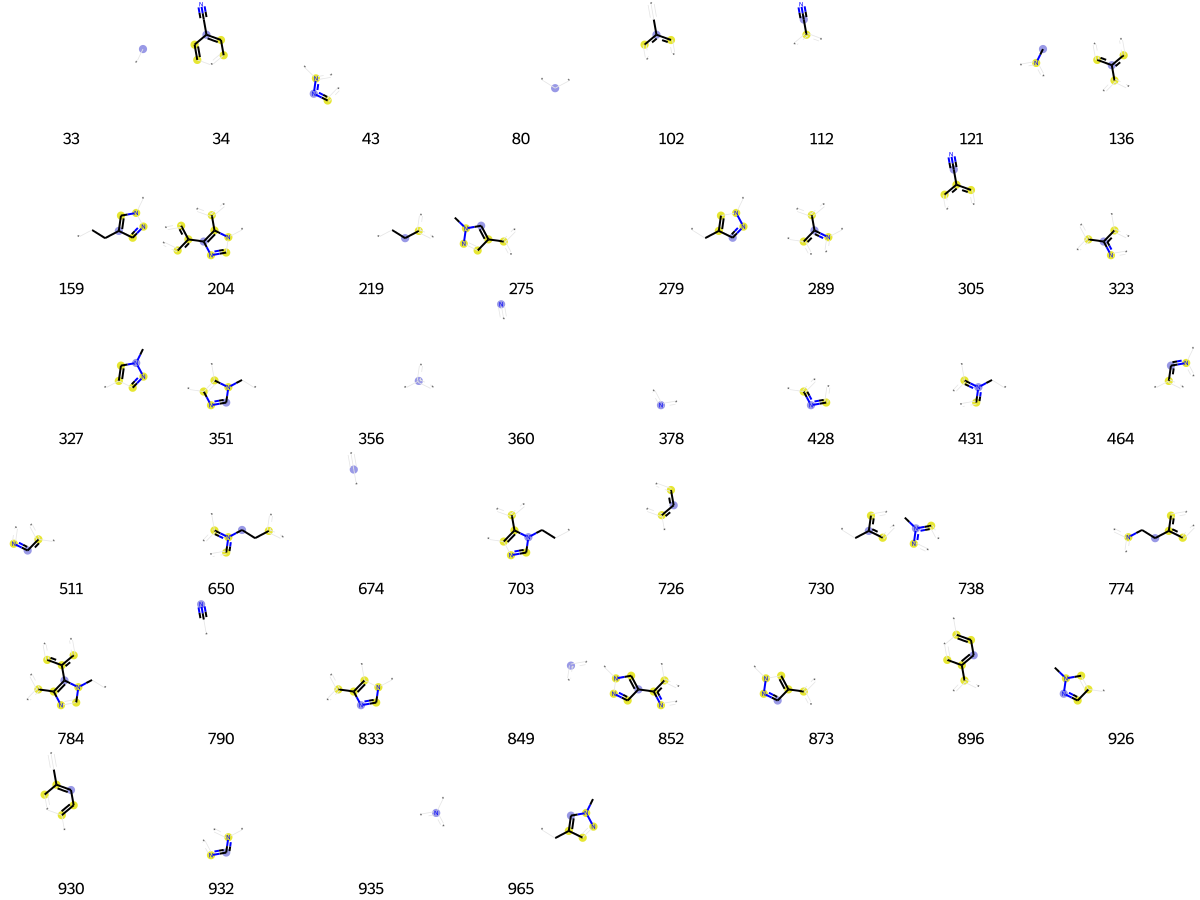

In [739]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [740]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[4,
 142,
 147,
 275,
 276,
 280,
 310,
 356,
 361,
 367,
 378,
 433,
 631,
 714,
 831,
 891,
 892,
 924,
 926]

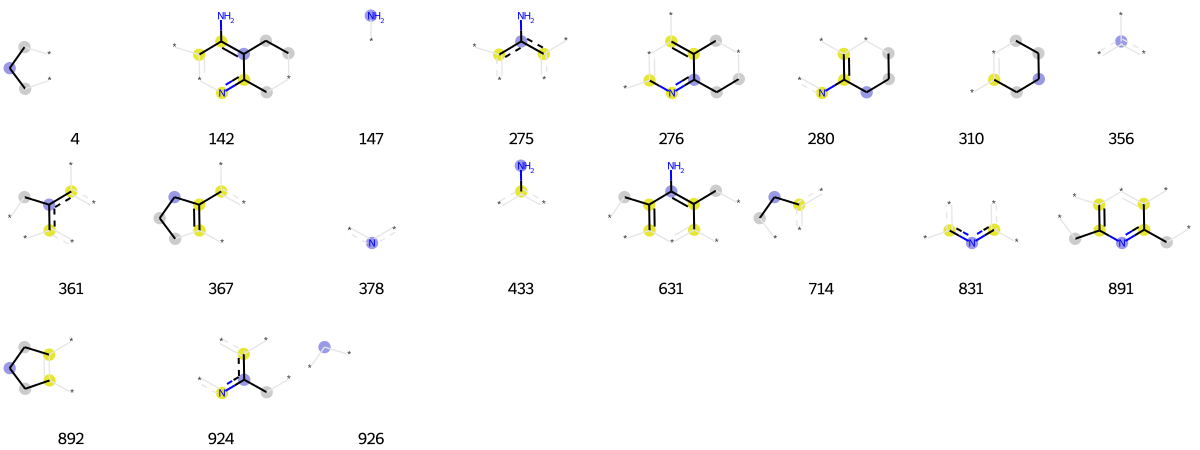

In [741]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [742]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[63,
 64,
 80,
 99,
 147,
 157,
 162,
 175,
 203,
 240,
 277,
 333,
 356,
 378,
 433,
 460,
 488,
 549,
 675,
 700,
 726,
 751,
 831,
 849,
 885]

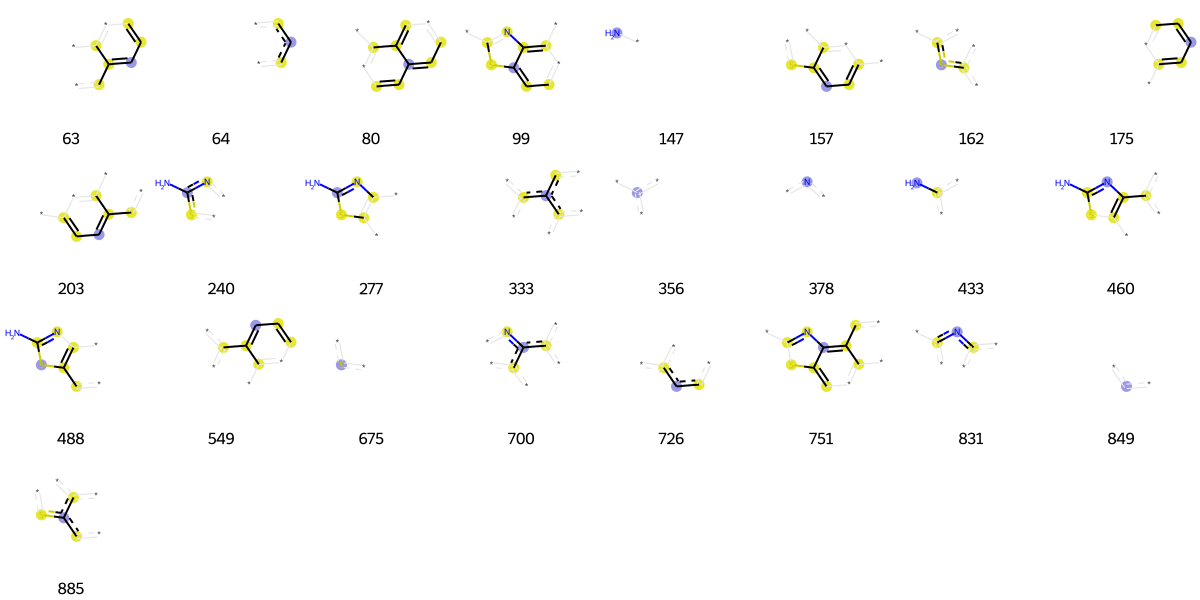

In [743]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [744]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[33,
 36,
 80,
 126,
 128,
 162,
 164,
 171,
 197,
 255,
 310,
 312,
 322,
 356,
 376,
 378,
 385,
 419,
 428,
 511,
 512,
 549,
 638,
 650,
 675,
 695,
 707,
 715,
 718,
 726,
 730,
 753,
 758,
 781,
 792,
 807,
 831,
 838,
 841,
 849,
 893,
 939,
 957,
 965,
 1004]

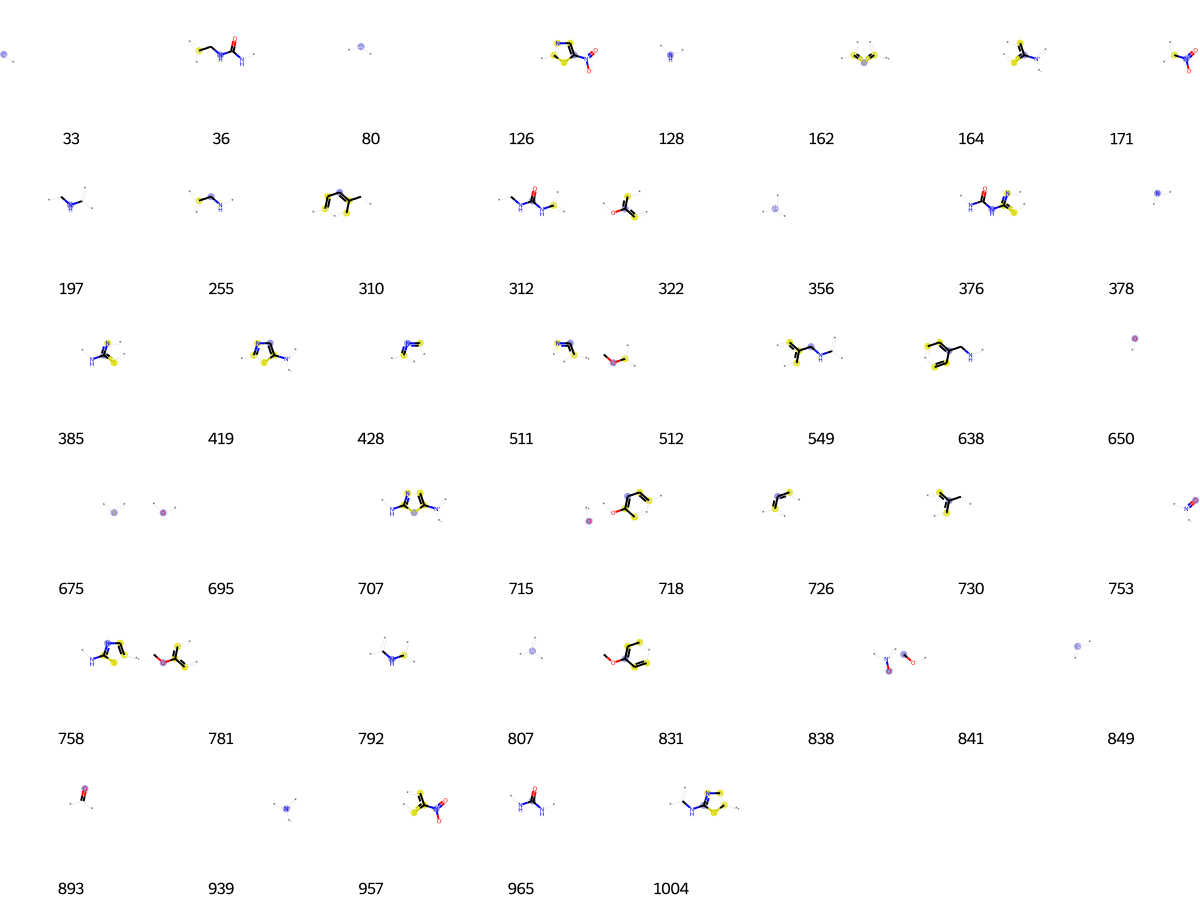

In [745]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [746]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[2,
 4,
 32,
 33,
 48,
 83,
 90,
 108,
 233,
 272,
 310,
 314,
 322,
 323,
 352,
 356,
 361,
 367,
 378,
 416,
 439,
 492,
 504,
 512,
 629,
 650,
 676,
 695,
 714,
 718,
 726,
 774,
 781,
 801,
 806,
 824,
 828,
 831,
 841,
 849,
 855,
 926,
 932,
 935]

In [748]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[1,
 15,
 33,
 64,
 80,
 90,
 94,
 119,
 145,
 147,
 214,
 252,
 283,
 294,
 356,
 378,
 386,
 391,
 428,
 474,
 490,
 504,
 511,
 555,
 602,
 650,
 664,
 695,
 698,
 721,
 726,
 731,
 759,
 807,
 849,
 893,
 905,
 921,
 924,
 931,
 946,
 954,
 960,
 1006]

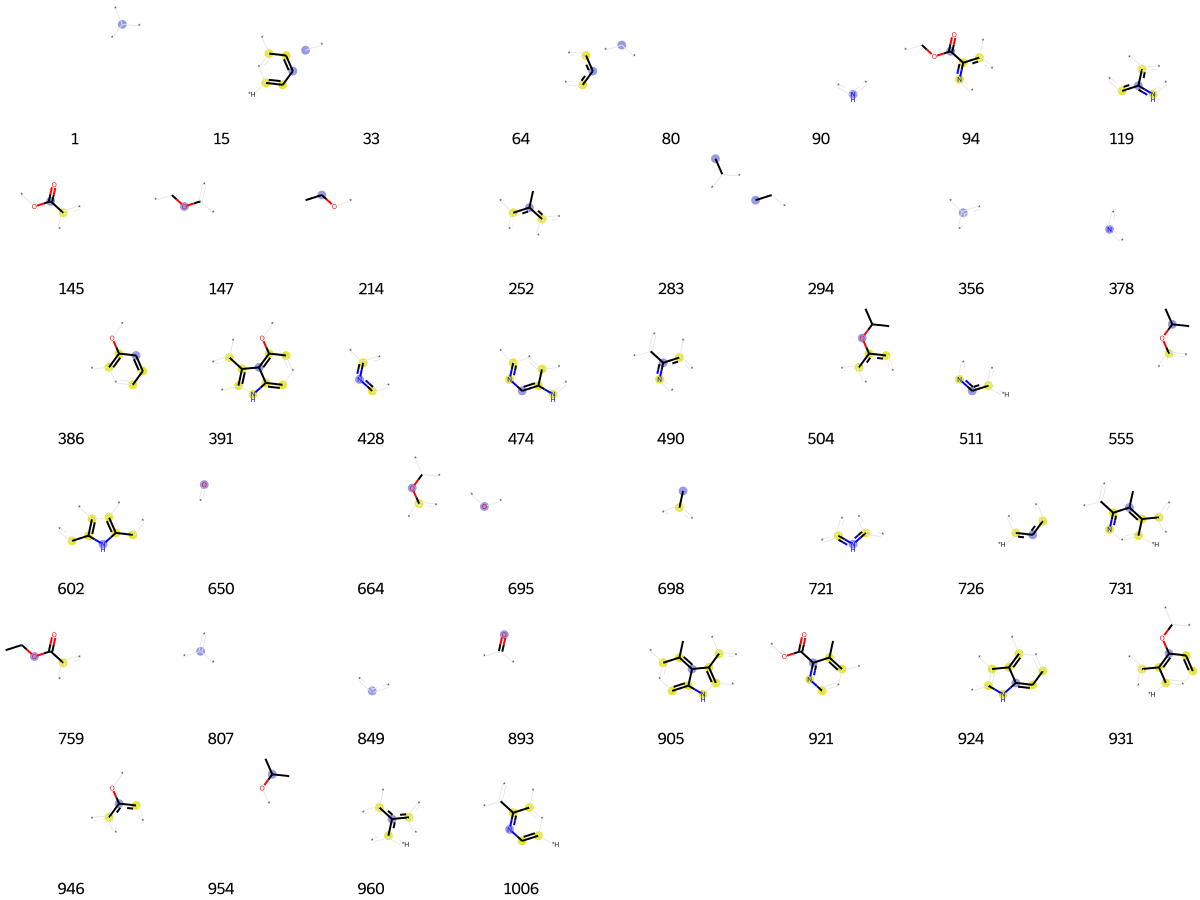

In [749]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [750]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[21,
 64,
 73,
 80,
 128,
 133,
 144,
 147,
 175,
 193,
 202,
 215,
 219,
 228,
 310,
 322,
 333,
 343,
 356,
 378,
 389,
 392,
 415,
 428,
 433,
 483,
 489,
 562,
 593,
 629,
 637,
 647,
 667,
 686,
 695,
 708,
 718,
 726,
 730,
 786,
 849,
 875,
 888,
 961]

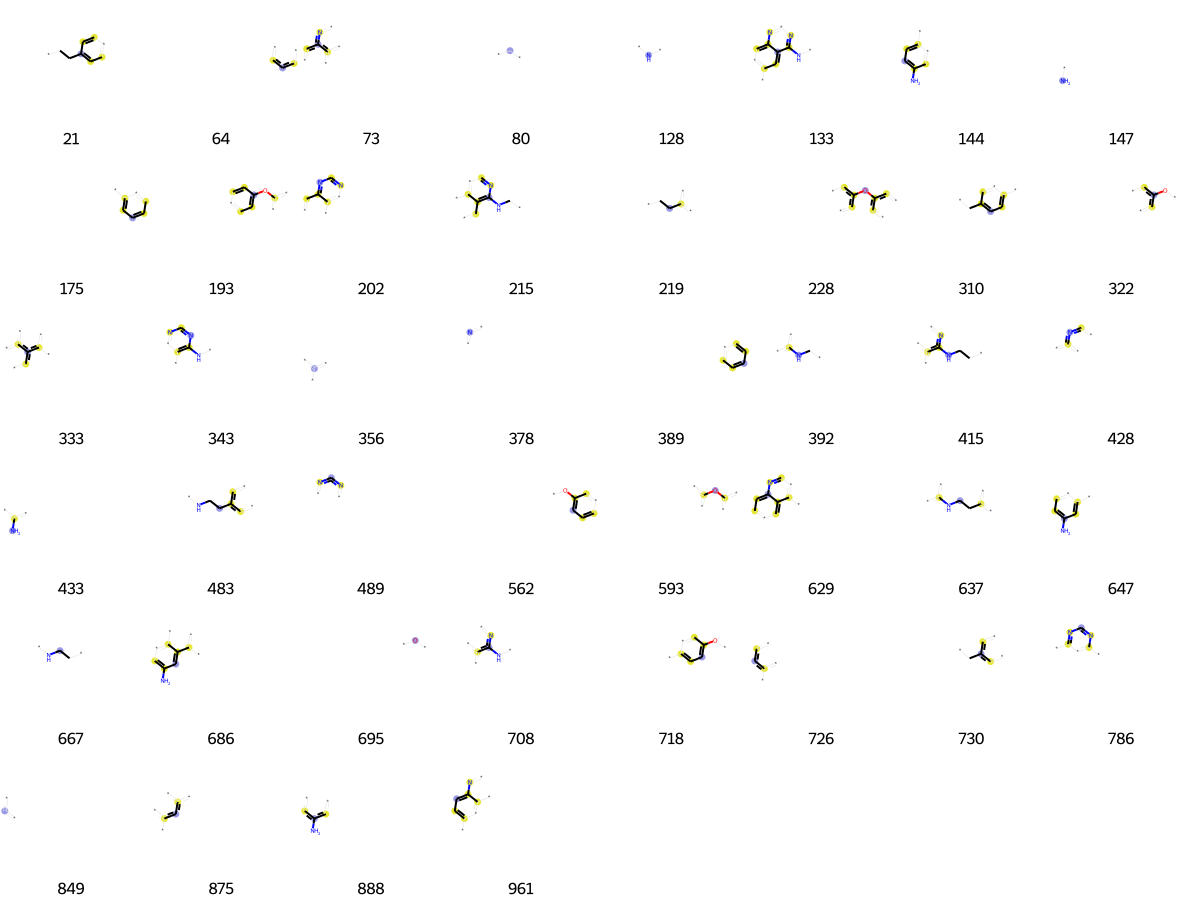

In [751]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [752]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[9,
 46,
 80,
 82,
 96,
 140,
 147,
 158,
 216,
 260,
 309,
 345,
 356,
 361,
 366,
 378,
 407,
 433,
 490,
 561,
 586,
 650,
 659,
 673,
 715,
 726,
 730,
 741,
 751,
 759,
 766,
 795,
 807,
 816,
 842,
 849,
 875,
 893,
 923,
 935,
 950,
 1011]

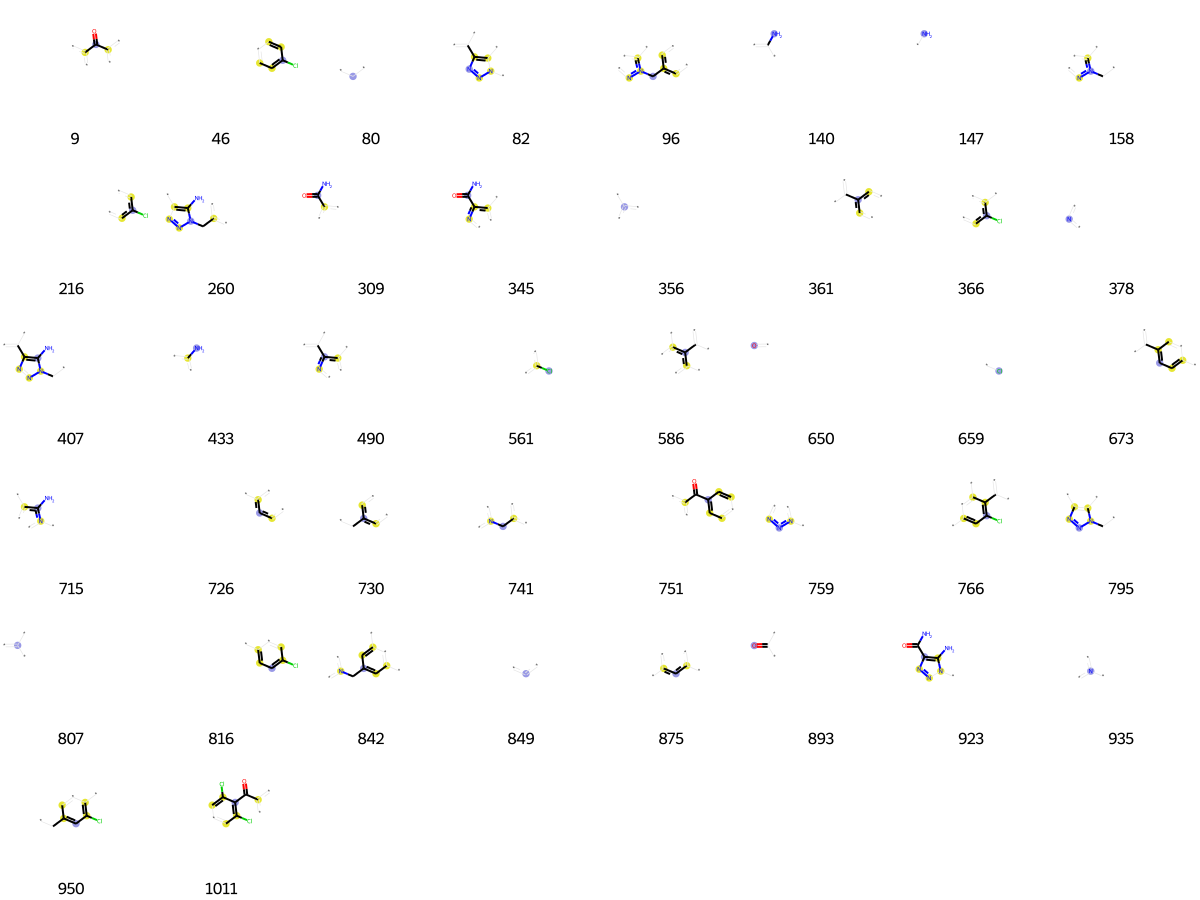

In [753]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [754]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[1,
 5,
 18,
 33,
 36,
 56,
 64,
 125,
 126,
 128,
 130,
 147,
 175,
 181,
 189,
 202,
 233,
 250,
 251,
 255,
 274,
 314,
 332,
 341,
 345,
 356,
 387,
 389,
 557,
 573,
 585,
 607,
 611,
 650,
 673,
 675,
 709,
 715,
 726,
 753,
 786,
 807,
 849,
 893,
 913,
 919,
 935,
 1019]

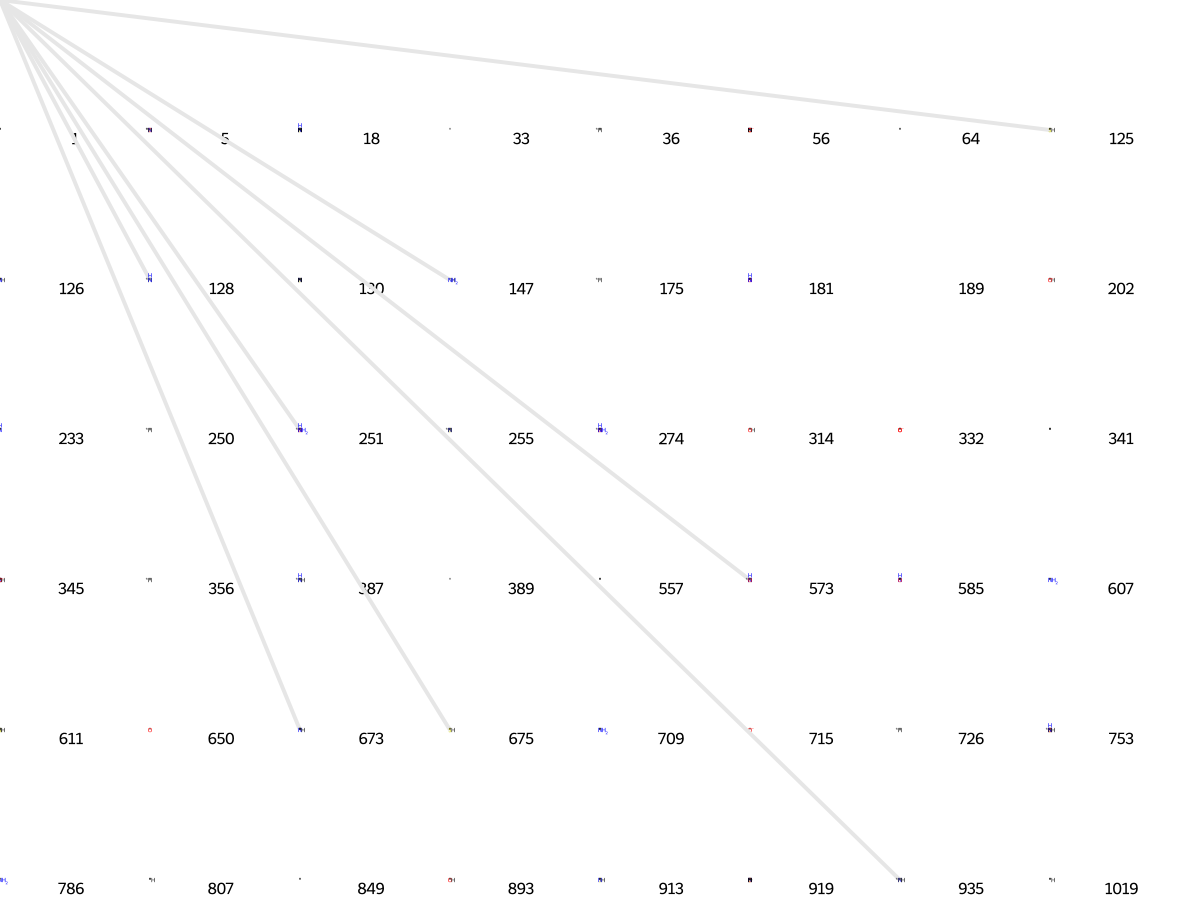

In [755]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [756]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[1,
 26,
 33,
 94,
 118,
 136,
 147,
 173,
 233,
 249,
 259,
 304,
 305,
 319,
 350,
 356,
 375,
 378,
 381,
 416,
 452,
 465,
 501,
 512,
 583,
 625,
 650,
 668,
 695,
 699,
 715,
 726,
 756,
 801,
 816,
 822,
 828,
 833,
 841,
 849,
 875,
 896,
 904,
 921,
 932,
 935,
 946,
 991]

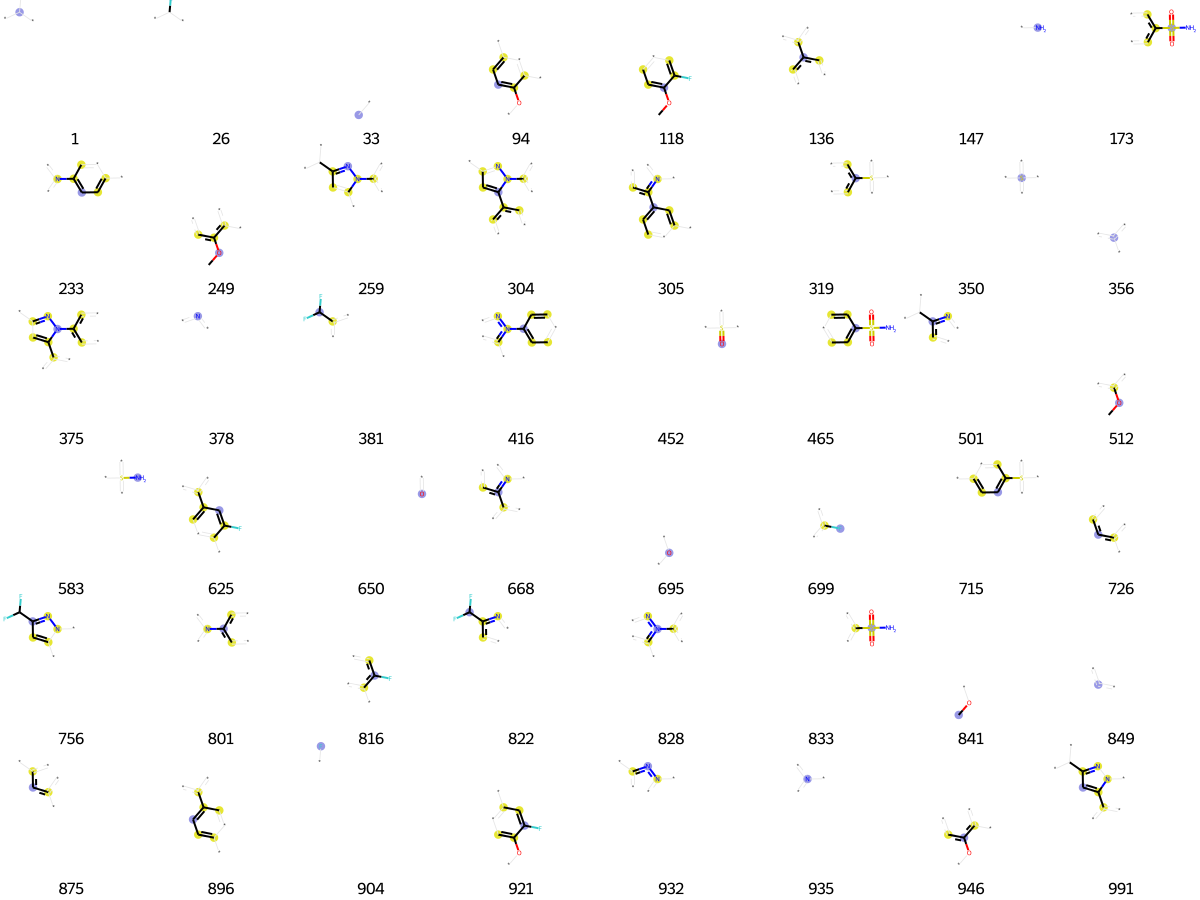

In [757]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [758]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[9,
 41,
 42,
 64,
 80,
 86,
 102,
 105,
 128,
 144,
 175,
 192,
 237,
 301,
 322,
 356,
 361,
 387,
 389,
 428,
 456,
 610,
 631,
 650,
 659,
 673,
 695,
 718,
 726,
 730,
 741,
 747,
 751,
 767,
 784,
 807,
 809,
 849,
 863,
 893,
 926,
 935,
 961,
 980,
 1019]

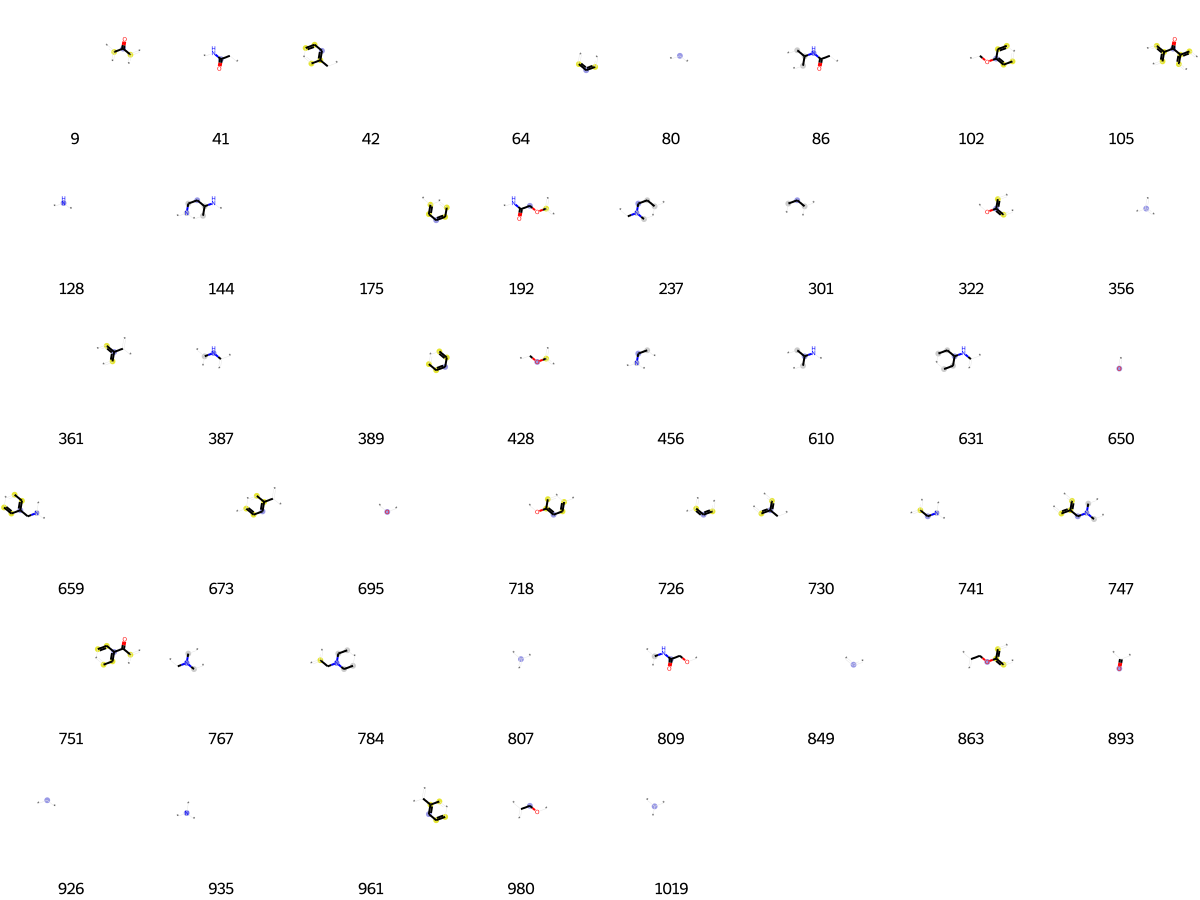

In [759]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [760]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[1,
 4,
 25,
 33,
 58,
 90,
 114,
 196,
 219,
 249,
 271,
 281,
 283,
 294,
 314,
 316,
 329,
 341,
 356,
 358,
 378,
 386,
 395,
 409,
 428,
 443,
 456,
 464,
 470,
 512,
 565,
 569,
 570,
 571,
 646,
 650,
 679,
 694,
 695,
 698,
 699,
 707,
 714,
 726,
 732,
 804,
 829,
 841,
 849,
 875,
 879,
 891,
 904,
 919,
 926,
 932,
 935,
 946,
 958,
 1009]

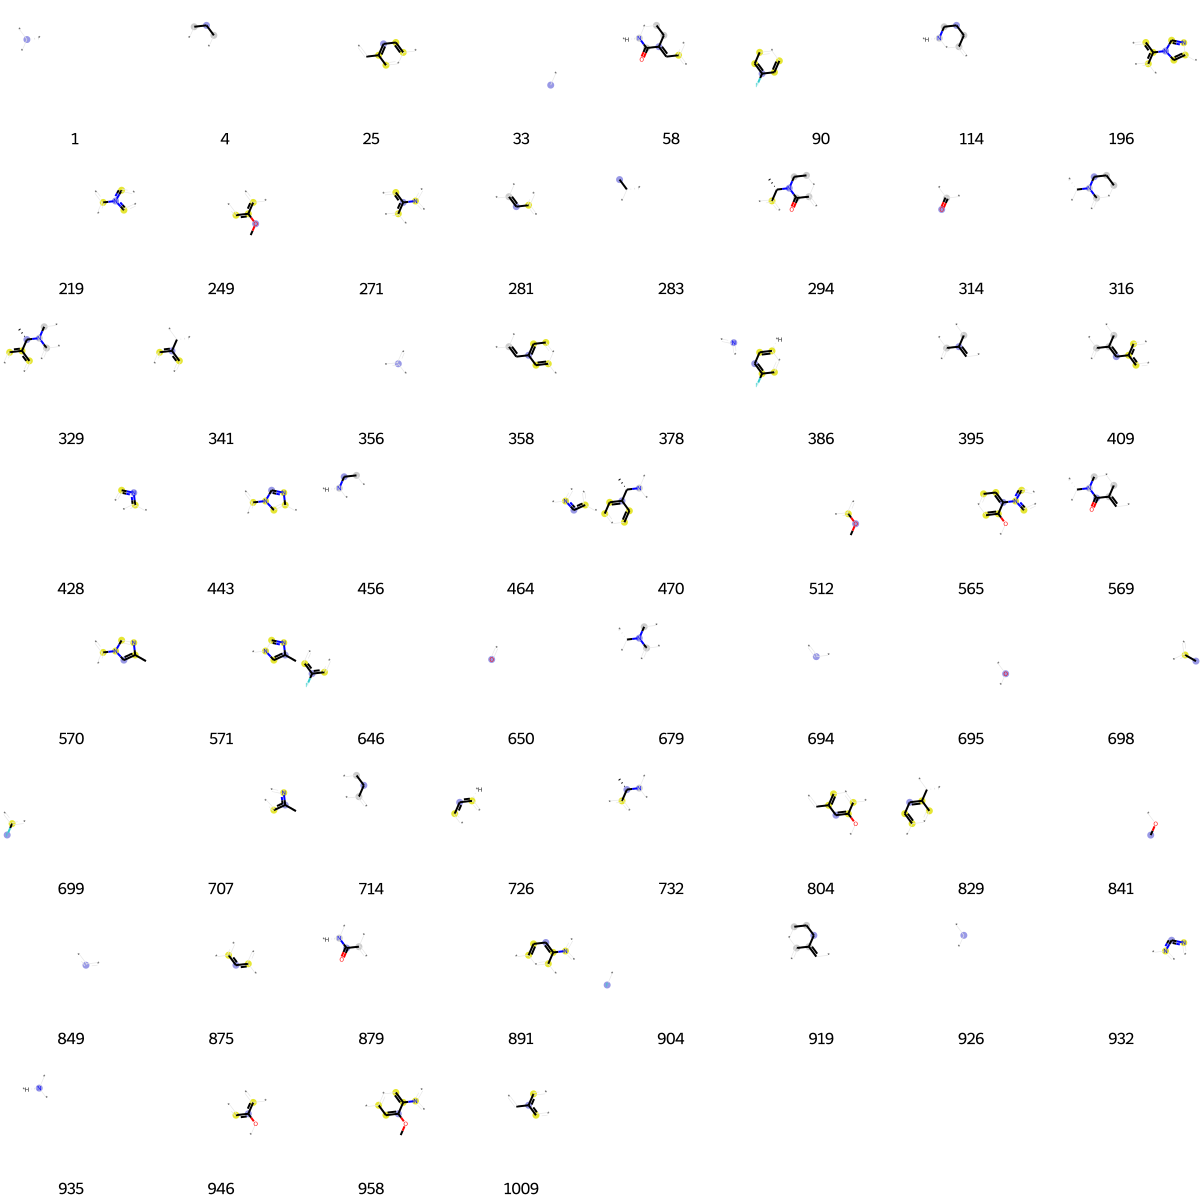

In [762]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [763]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[2,
 4,
 92,
 128,
 301,
 350,
 428,
 437,
 452,
 455,
 592,
 606,
 610,
 650,
 807,
 890,
 911,
 926,
 1019]

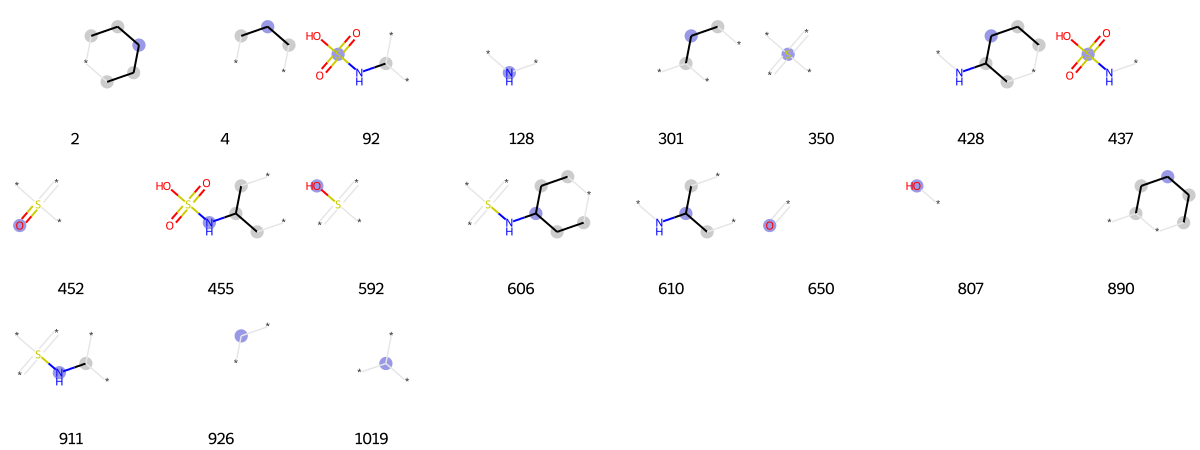

In [764]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [765]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[41,
 74,
 80,
 90,
 119,
 121,
 147,
 191,
 211,
 216,
 274,
 314,
 342,
 356,
 361,
 427,
 437,
 456,
 458,
 533,
 540,
 561,
 565,
 576,
 580,
 637,
 638,
 650,
 656,
 659,
 669,
 673,
 679,
 695,
 721,
 723,
 725,
 726,
 730,
 743,
 745,
 767,
 784,
 807,
 849,
 856,
 873,
 875,
 890,
 893,
 915,
 926,
 935,
 985,
 986]

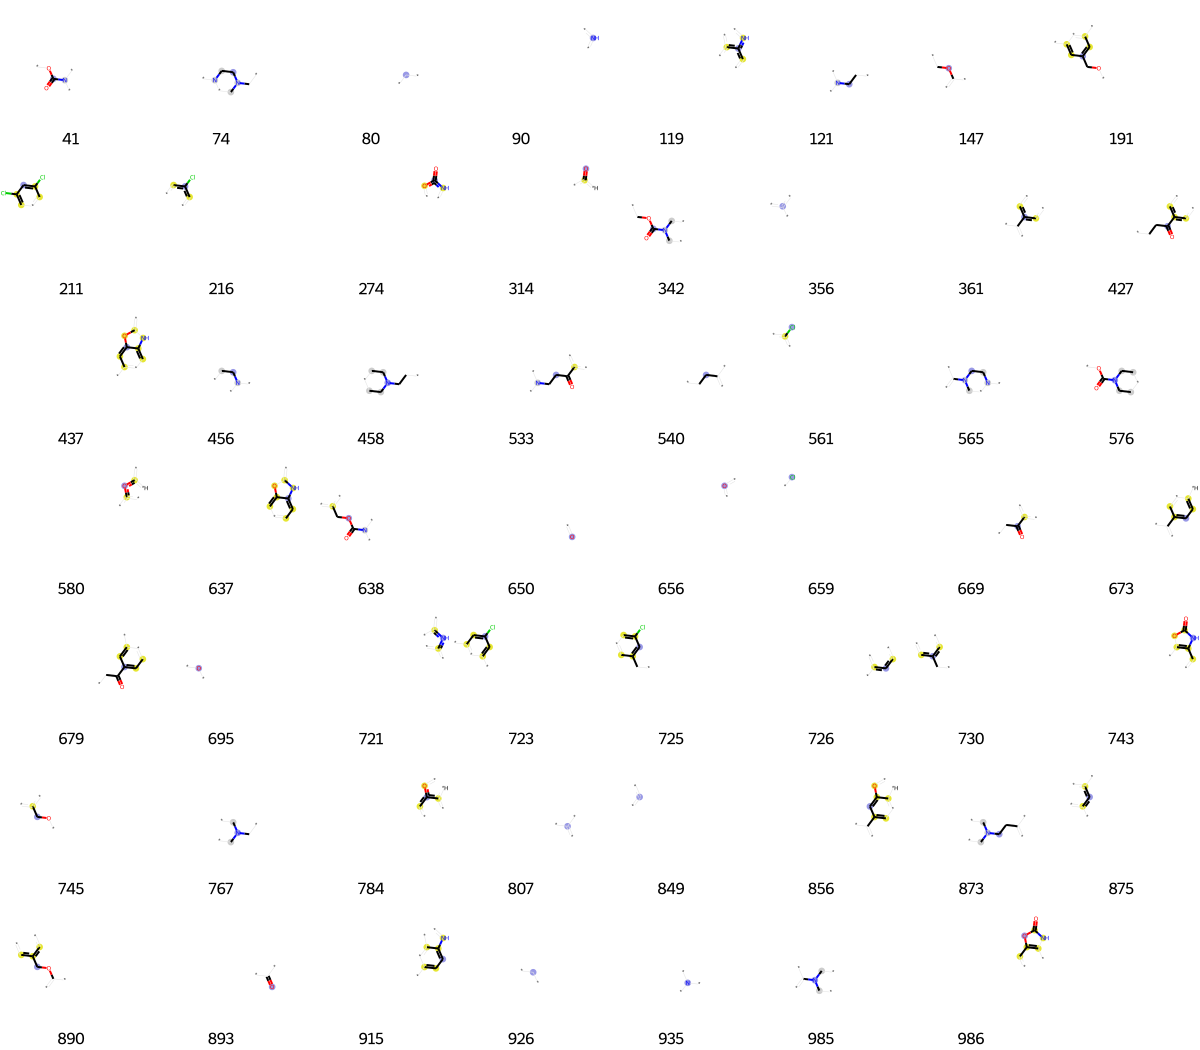

In [766]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [767]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[1,
 33,
 50,
 80,
 158,
 294,
 330,
 356,
 378,
 428,
 464,
 488,
 506,
 511,
 520,
 567,
 573,
 578,
 600,
 605,
 666,
 672,
 674,
 742,
 744,
 806,
 807,
 820,
 831,
 849,
 862,
 865,
 915,
 935,
 974,
 997]

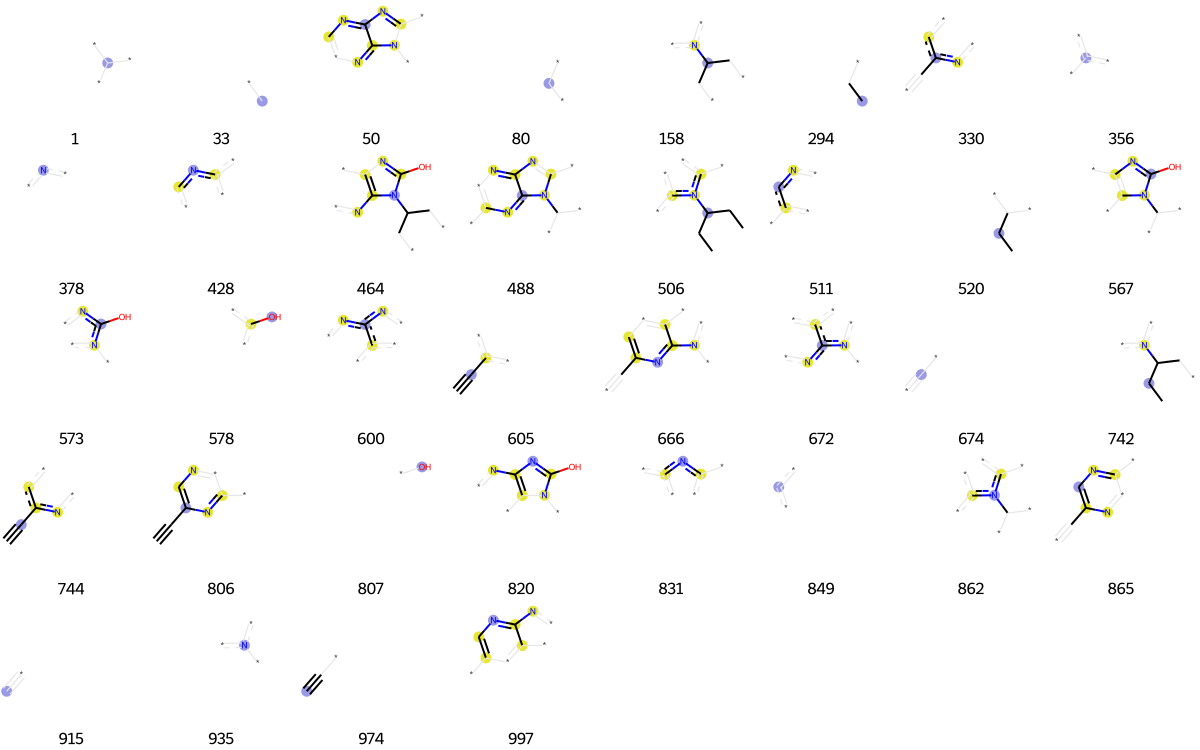

In [768]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [769]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[36,
 45,
 64,
 80,
 90,
 109,
 121,
 138,
 160,
 173,
 175,
 212,
 219,
 233,
 236,
 256,
 261,
 286,
 290,
 325,
 333,
 356,
 386,
 404,
 409,
 432,
 436,
 456,
 458,
 464,
 503,
 528,
 549,
 564,
 609,
 646,
 649,
 653,
 656,
 664,
 684,
 699,
 702,
 726,
 767,
 801,
 836,
 849,
 887,
 893,
 904,
 926,
 935,
 956,
 1017]

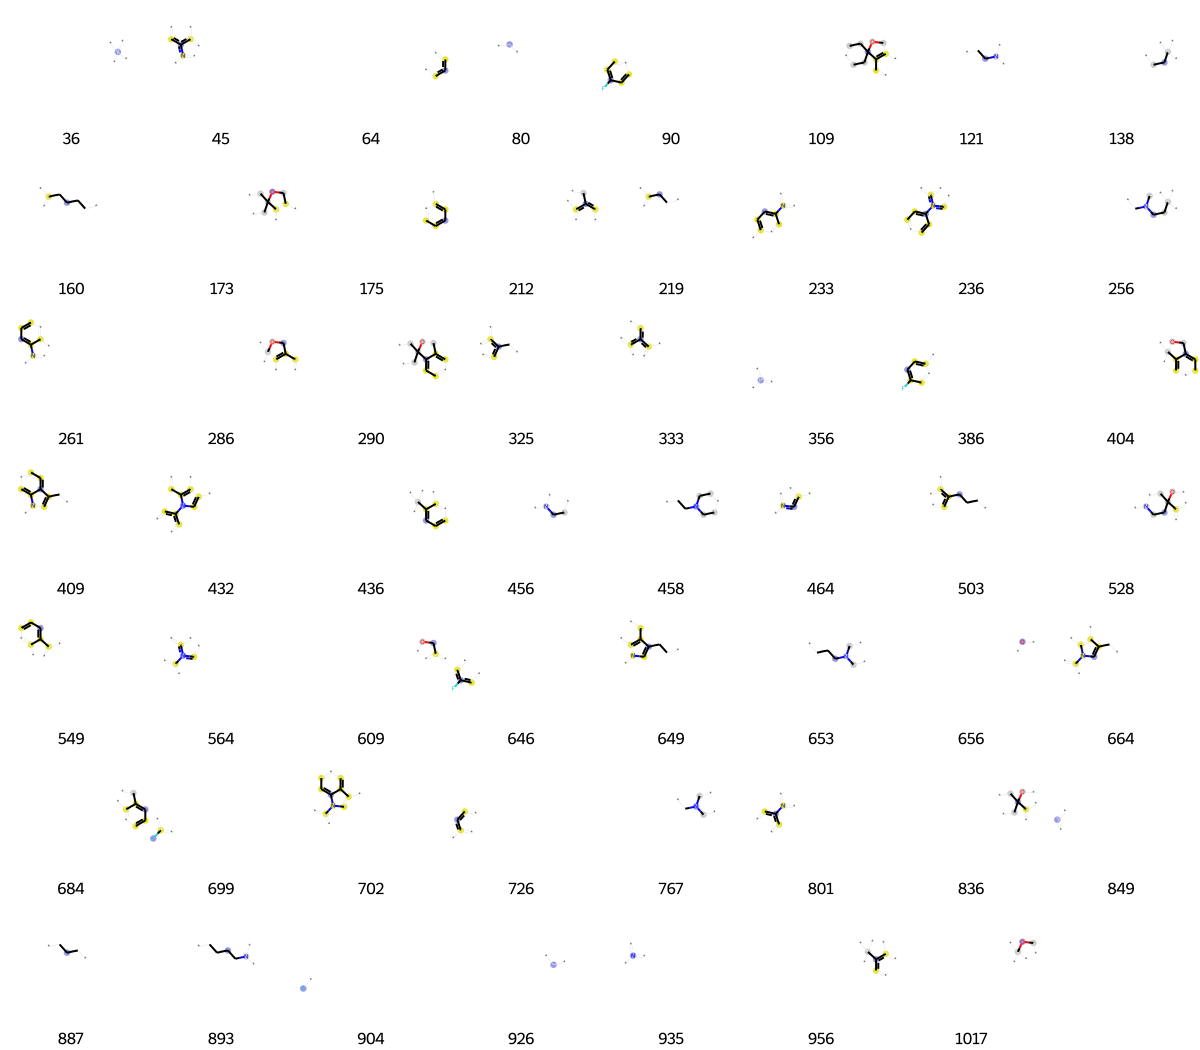

In [770]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [771]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[13,
 80,
 136,
 157,
 165,
 167,
 194,
 210,
 222,
 233,
 299,
 315,
 318,
 333,
 352,
 356,
 397,
 451,
 463,
 489,
 492,
 524,
 578,
 583,
 589,
 607,
 610,
 624,
 656,
 691,
 695,
 696,
 726,
 740,
 745,
 807,
 820,
 849,
 855,
 875,
 896,
 897,
 934,
 946,
 953,
 964,
 990,
 1017,
 1019]

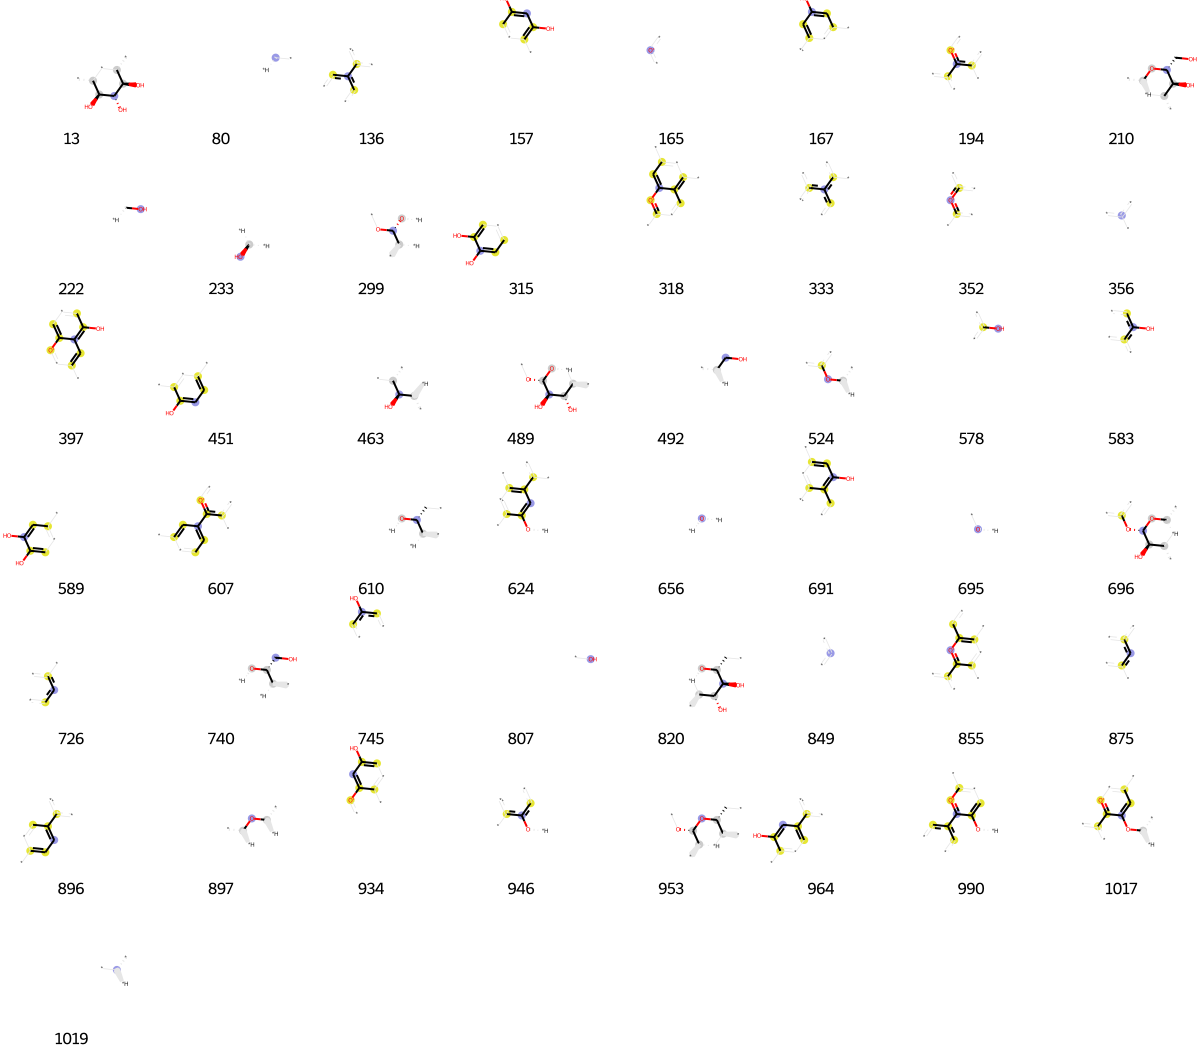

In [772]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [773]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[33,
 36,
 74,
 90,
 97,
 112,
 121,
 124,
 136,
 232,
 250,
 254,
 258,
 305,
 324,
 356,
 358,
 360,
 372,
 390,
 564,
 602,
 644,
 656,
 668,
 674,
 682,
 693,
 726,
 750,
 790,
 849,
 867,
 875,
 896,
 928,
 935,
 956,
 958,
 980,
 1023]

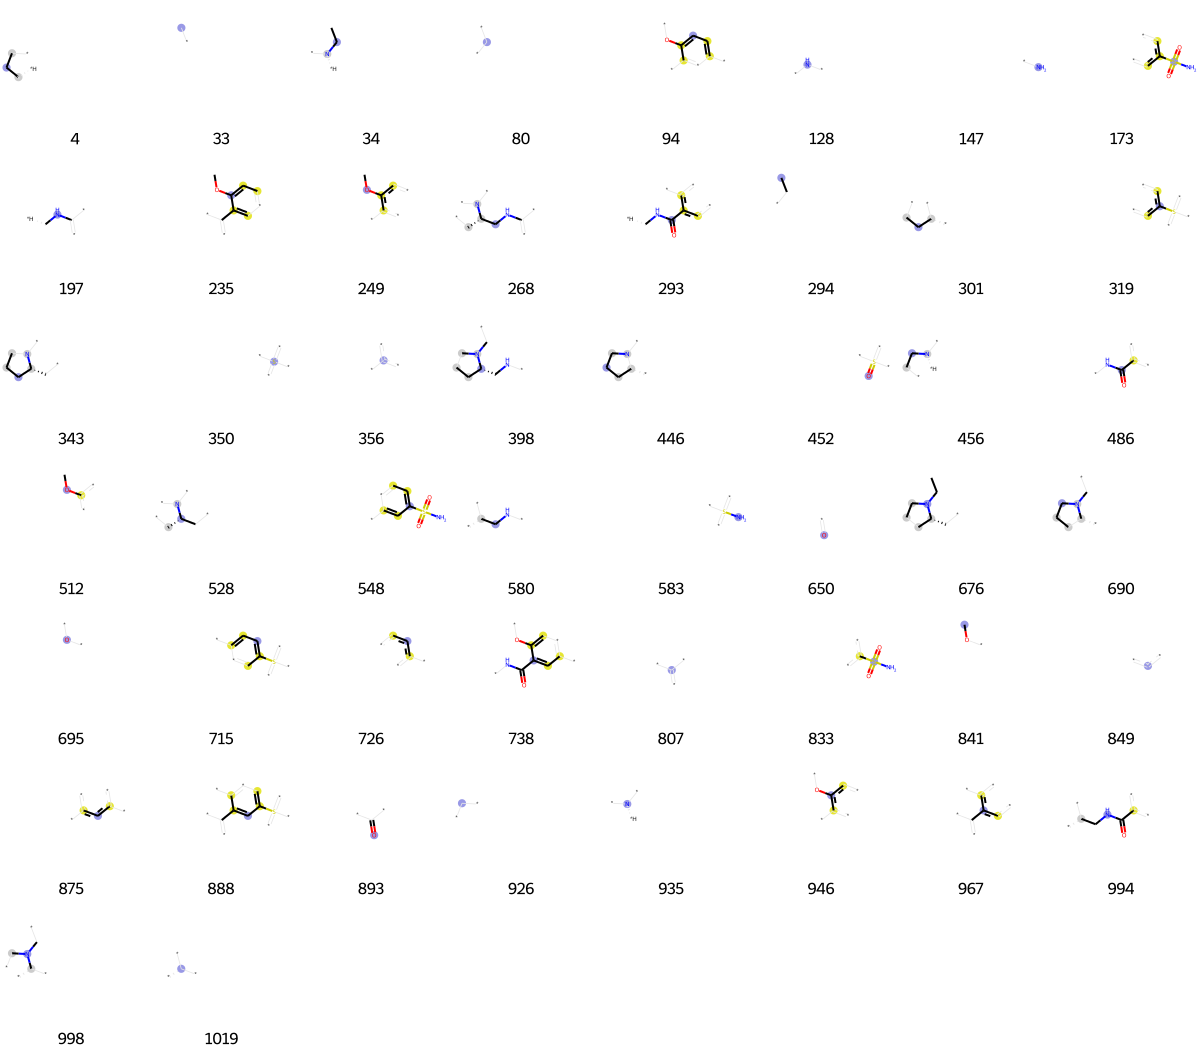

In [774]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [775]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[1,
 4,
 33,
 42,
 64,
 69,
 79,
 80,
 108,
 116,
 117,
 128,
 143,
 144,
 153,
 175,
 193,
 242,
 283,
 301,
 330,
 354,
 356,
 388,
 389,
 446,
 456,
 468,
 488,
 531,
 600,
 624,
 650,
 661,
 689,
 726,
 730,
 736,
 807,
 820,
 837,
 849,
 851,
 857,
 893,
 926,
 935,
 960,
 982,
 1017,
 1019]

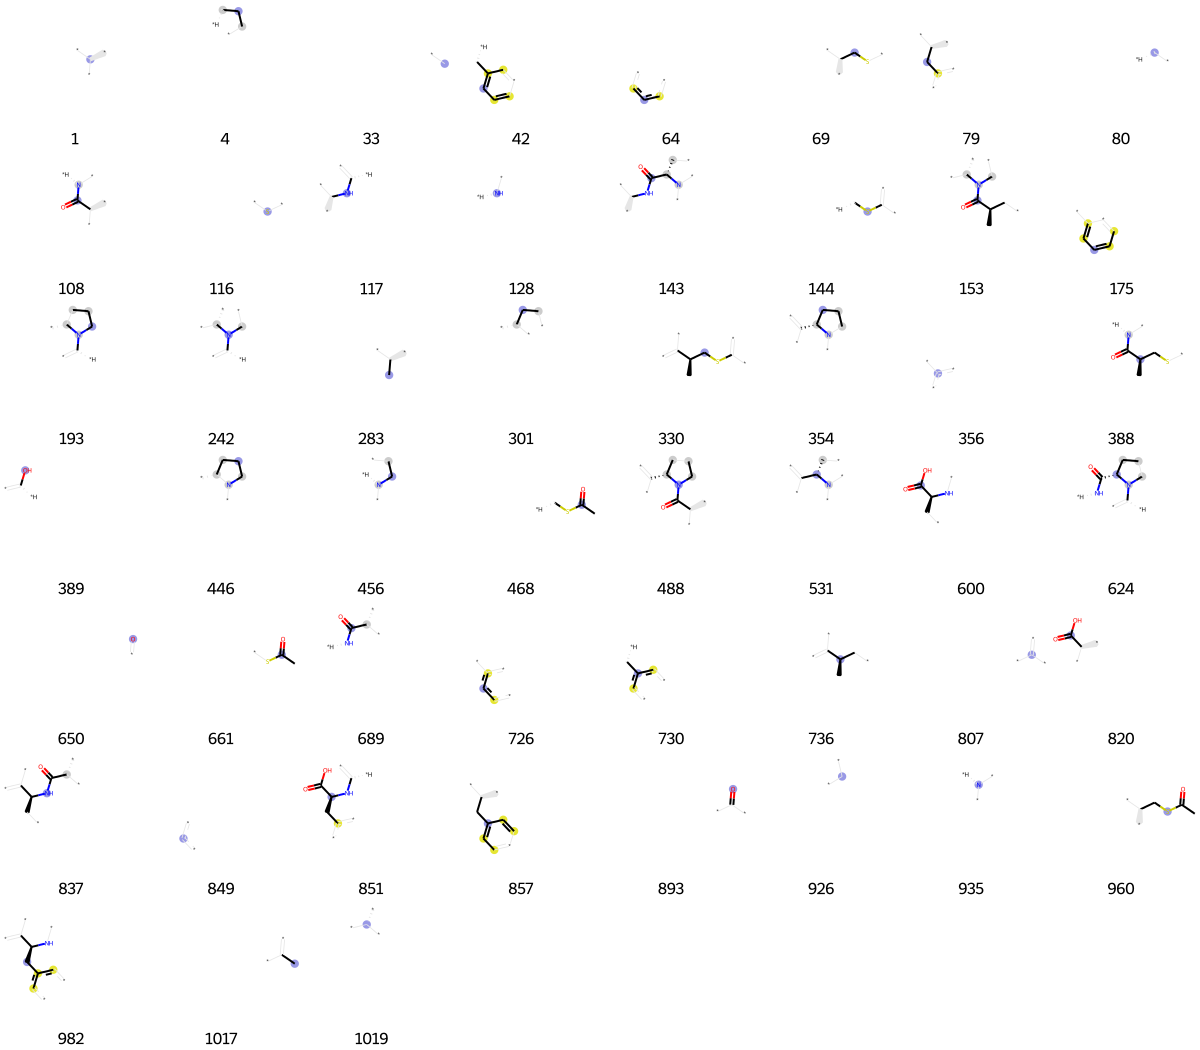

In [776]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [777]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[33,
 42,
 45,
 64,
 77,
 80,
 144,
 171,
 175,
 233,
 237,
 261,
 294,
 333,
 335,
 356,
 369,
 389,
 420,
 431,
 455,
 479,
 549,
 591,
 595,
 655,
 659,
 725,
 726,
 730,
 741,
 785,
 789,
 794,
 849,
 887,
 914,
 935]

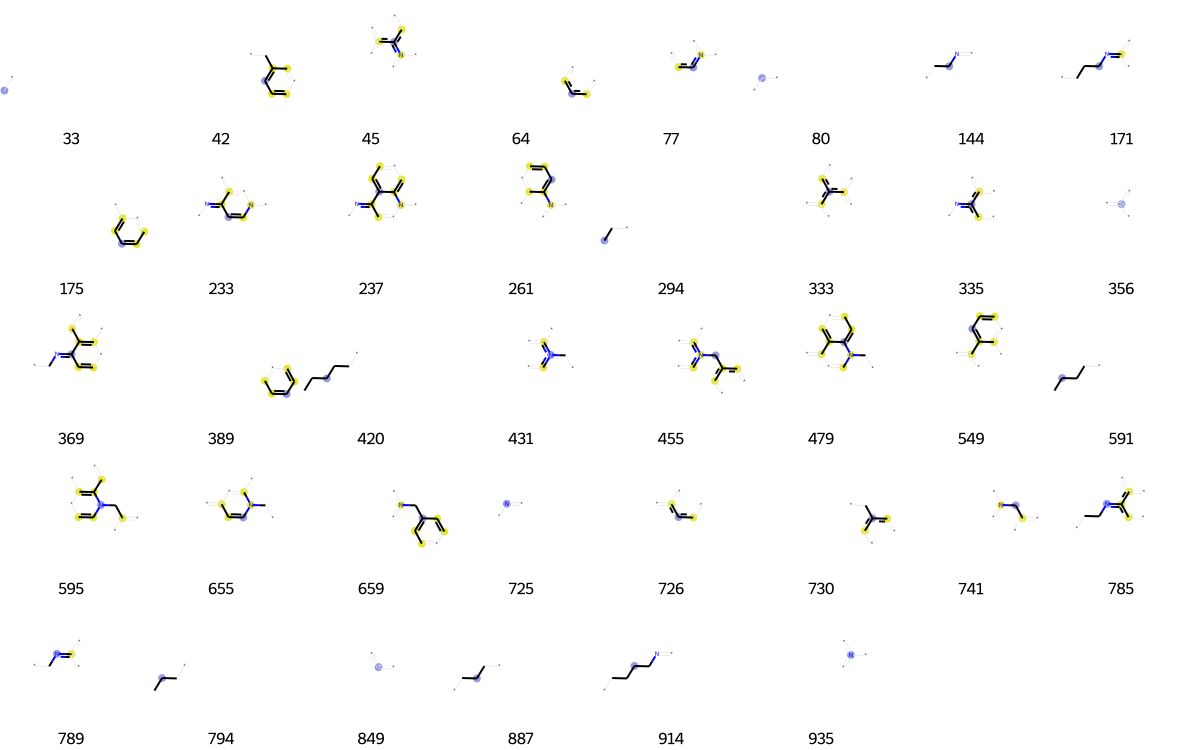

In [778]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [779]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[64,
 80,
 117,
 128,
 136,
 164,
 171,
 175,
 205,
 240,
 242,
 279,
 325,
 354,
 356,
 366,
 375,
 378,
 385,
 389,
 426,
 446,
 530,
 543,
 552,
 561,
 573,
 627,
 650,
 659,
 666,
 675,
 700,
 702,
 715,
 716,
 725,
 726,
 753,
 755,
 788,
 794,
 806,
 807,
 829,
 831,
 838,
 842,
 844,
 849,
 875,
 893,
 896,
 939,
 980]

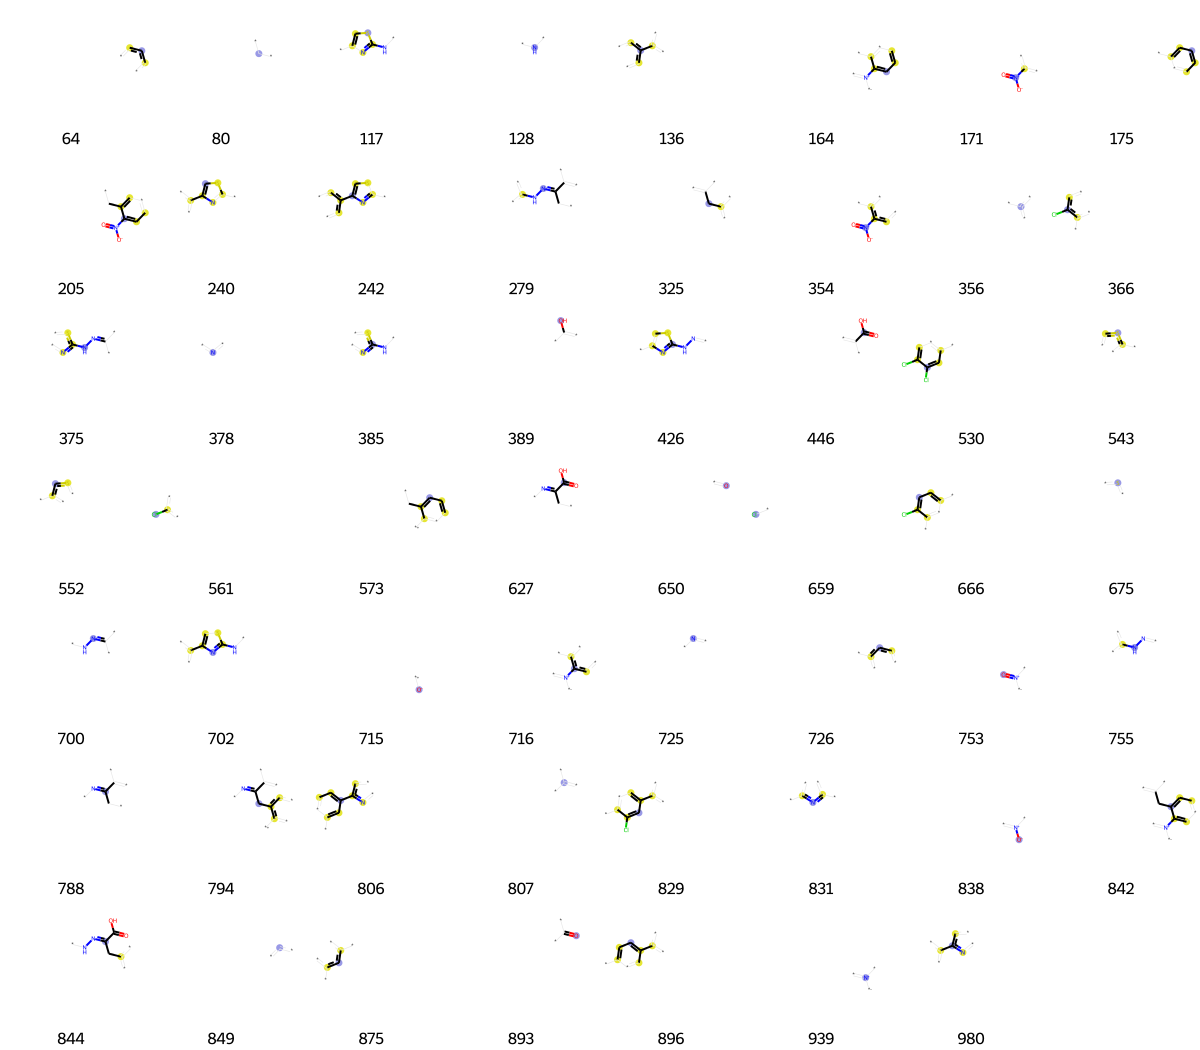

In [780]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [781]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[33,
 36,
 64,
 80,
 90,
 119,
 121,
 138,
 175,
 193,
 218,
 219,
 256,
 257,
 299,
 325,
 328,
 333,
 356,
 362,
 364,
 386,
 389,
 456,
 458,
 463,
 476,
 646,
 693,
 695,
 696,
 699,
 715,
 726,
 728,
 730,
 767,
 773,
 797,
 806,
 818,
 841,
 842,
 849,
 855,
 875,
 904,
 913,
 915,
 926,
 935,
 941,
 960,
 967,
 992]

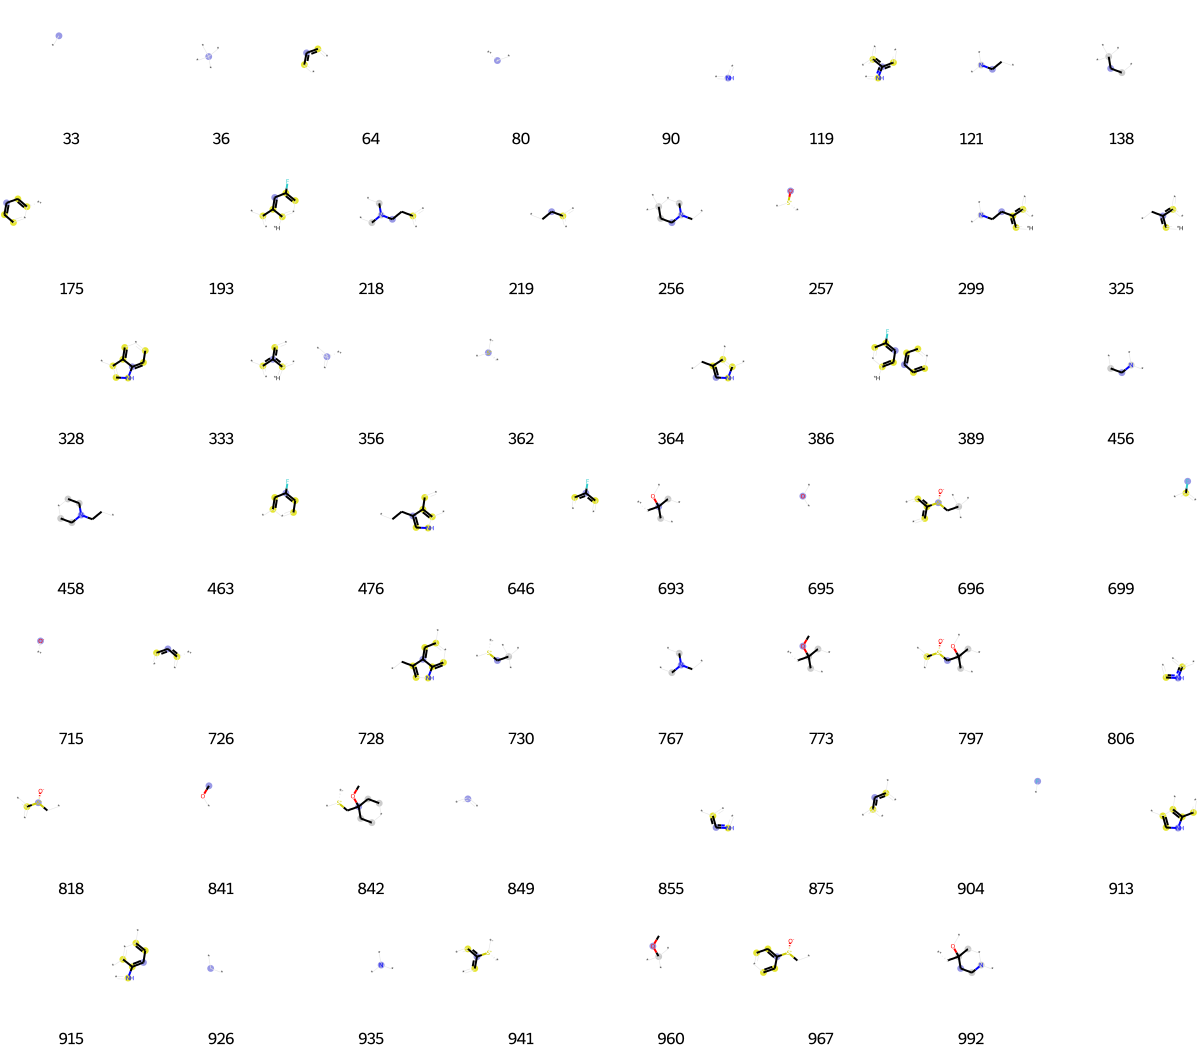

In [782]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [783]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[21,
 80,
 86,
 119,
 160,
 219,
 243,
 263,
 310,
 356,
 389,
 470,
 503,
 540,
 570,
 650,
 661,
 713,
 726,
 730,
 807,
 849,
 887,
 893,
 947,
 978]

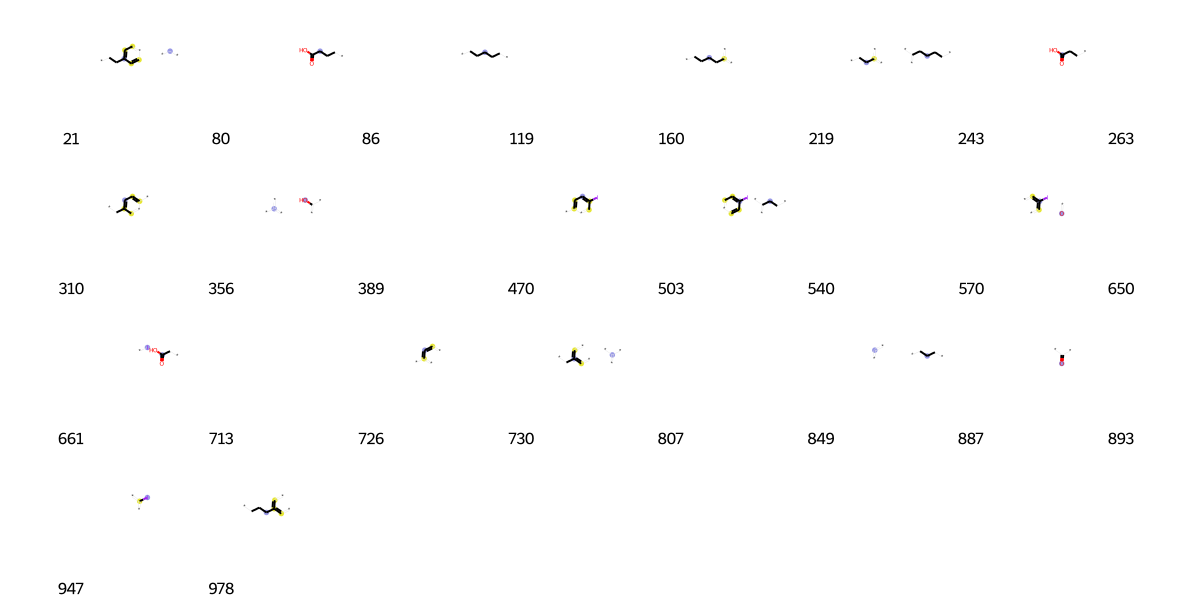

In [784]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [785]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[2,
 33,
 36,
 43,
 65,
 80,
 87,
 90,
 128,
 136,
 141,
 147,
 225,
 226,
 232,
 276,
 294,
 323,
 333,
 350,
 356,
 360,
 378,
 428,
 452,
 464,
 478,
 479,
 482,
 489,
 511,
 585,
 602,
 650,
 674,
 675,
 676,
 711,
 723,
 726,
 741,
 786,
 790,
 793,
 806,
 849,
 852,
 872,
 873,
 891,
 923,
 926,
 935,
 947]

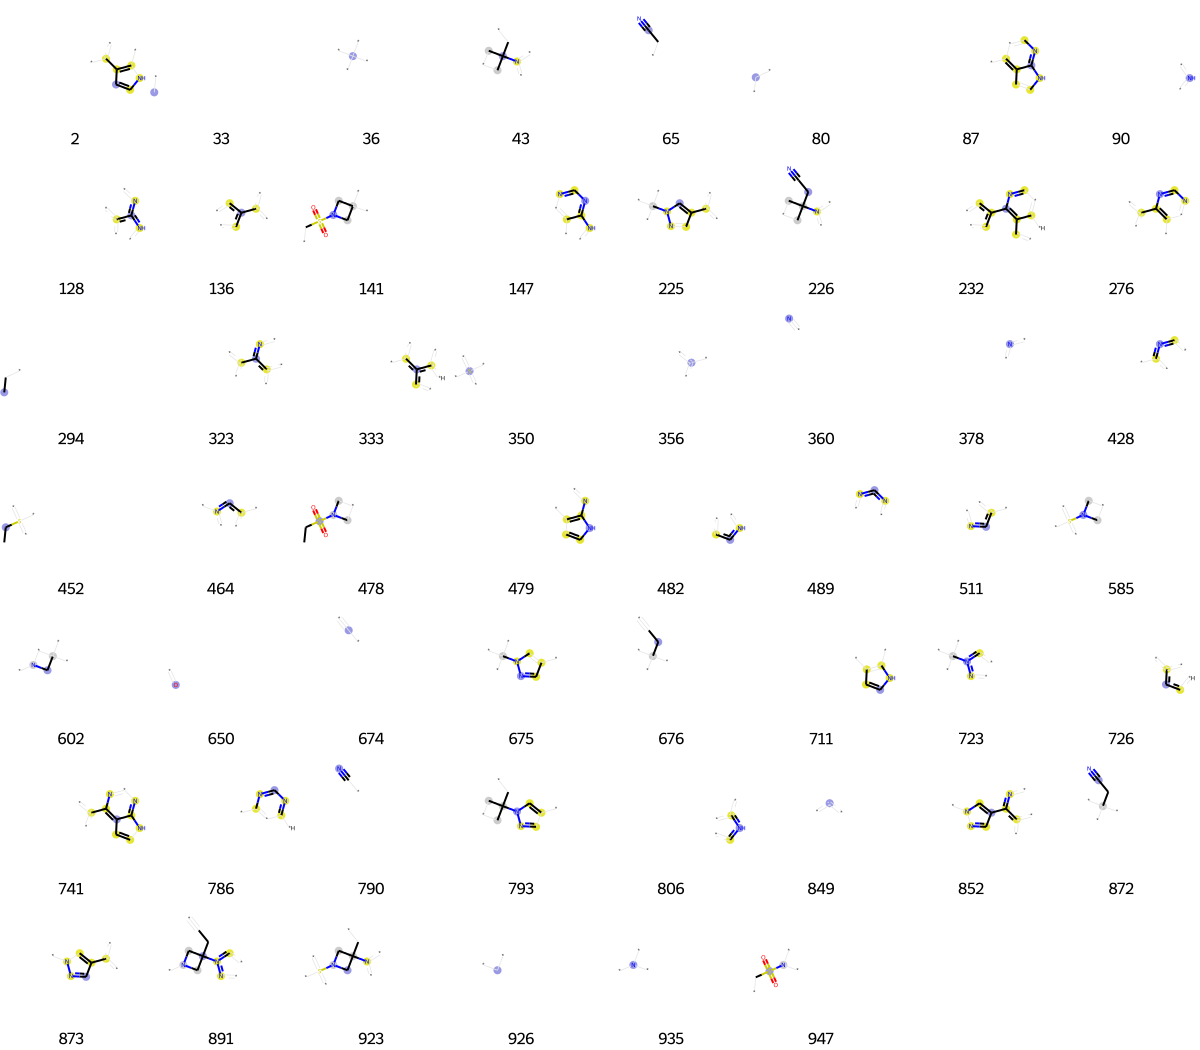

In [786]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [787]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[29,
 33,
 64,
 80,
 112,
 235,
 242,
 245,
 285,
 301,
 311,
 352,
 356,
 361,
 378,
 386,
 425,
 428,
 448,
 461,
 480,
 494,
 511,
 530,
 546,
 587,
 596,
 646,
 647,
 650,
 680,
 695,
 698,
 699,
 714,
 726,
 734,
 739,
 799,
 807,
 841,
 842,
 849,
 860,
 875,
 878,
 883,
 884,
 892,
 893,
 904,
 914,
 926,
 935,
 967,
 969,
 1005,
 1013,
 1019]

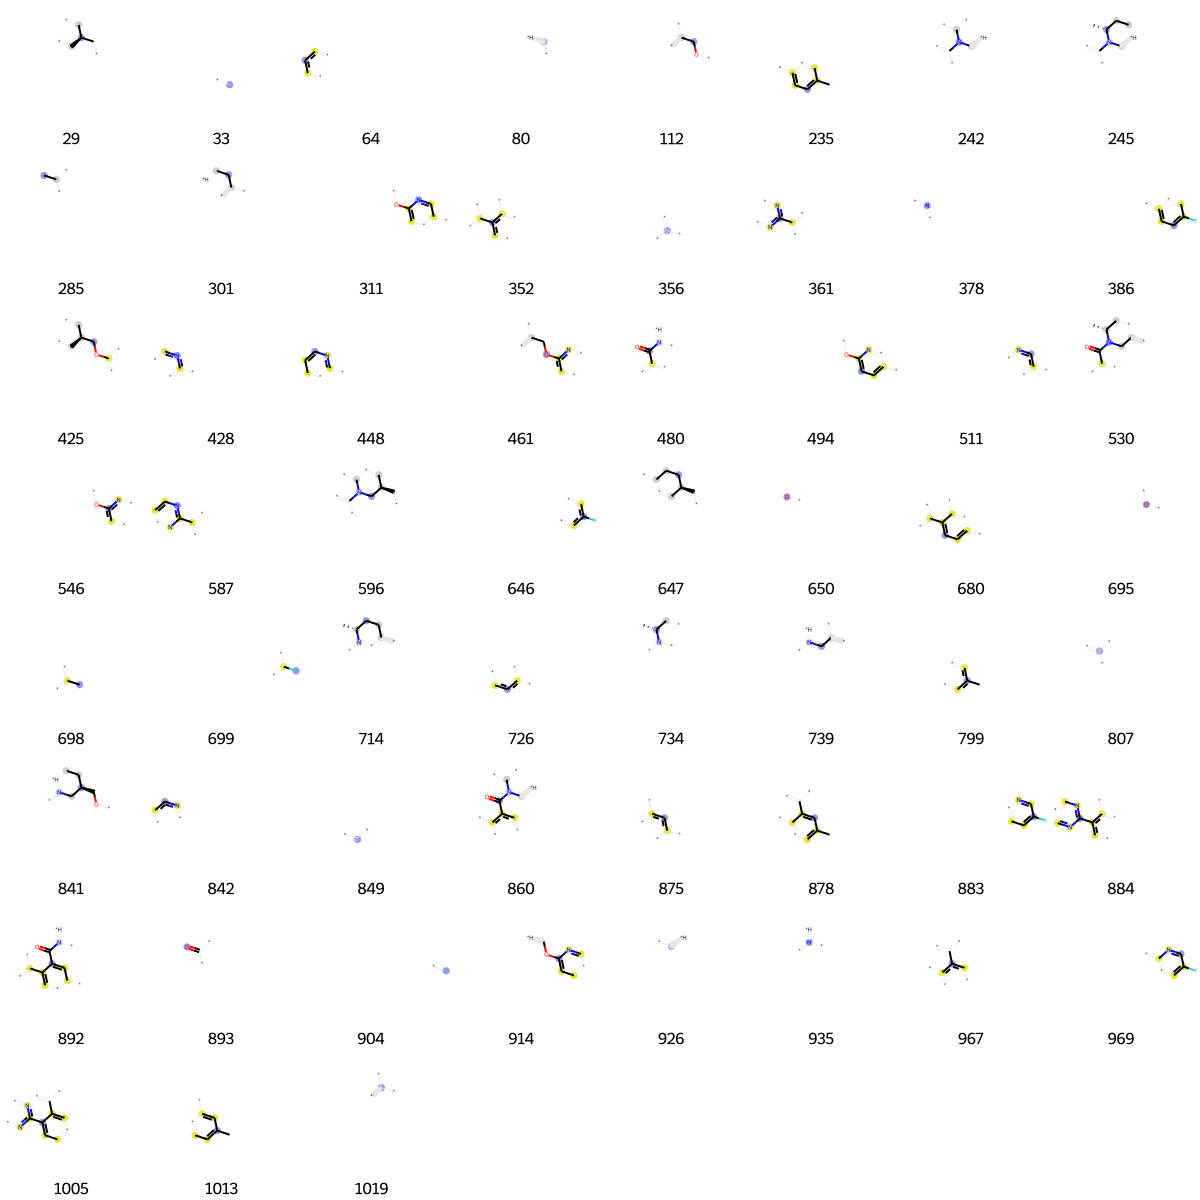

In [788]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [789]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[1,
 33,
 121,
 237,
 248,
 283,
 356,
 366,
 367,
 455,
 531,
 561,
 578,
 583,
 598,
 659,
 698,
 807,
 849,
 851,
 862,
 875,
 886]

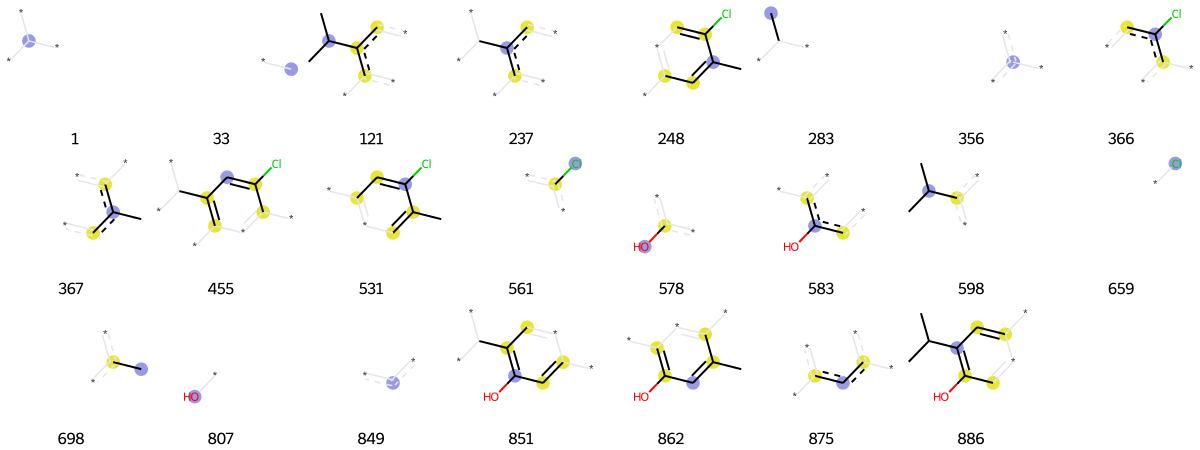

In [790]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [791]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[33, 80, 128, 294, 298, 592, 603, 667, 702, 771, 839, 887, 1004, 1020]

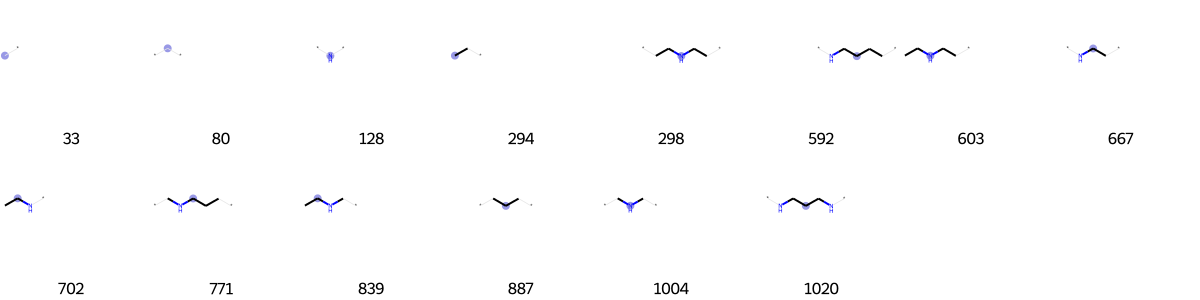

In [792]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [793]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[23,
 33,
 64,
 80,
 175,
 214,
 237,
 294,
 356,
 386,
 389,
 423,
 425,
 428,
 456,
 500,
 592,
 650,
 695,
 726,
 807,
 849,
 893,
 946,
 967]

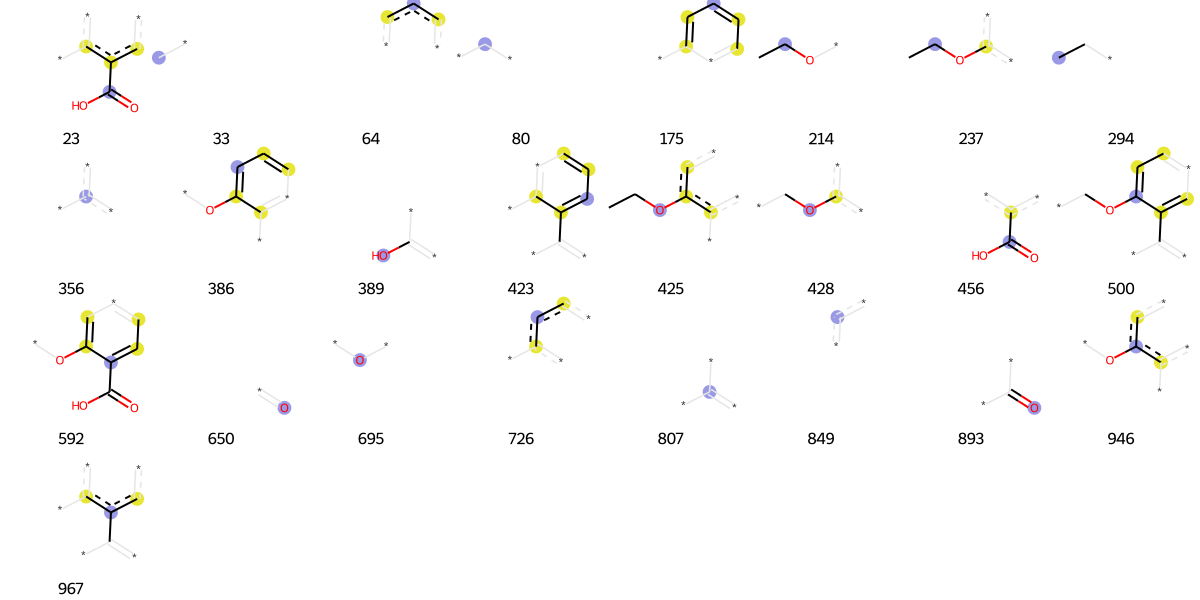

In [794]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [795]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[1,
 11,
 23,
 43,
 78,
 80,
 128,
 168,
 212,
 227,
 301,
 356,
 386,
 394,
 463,
 606,
 616,
 646,
 656,
 699,
 713,
 714,
 726,
 750,
 807,
 812,
 849,
 856,
 875,
 881,
 904,
 914,
 926,
 971,
 1004,
 1019]

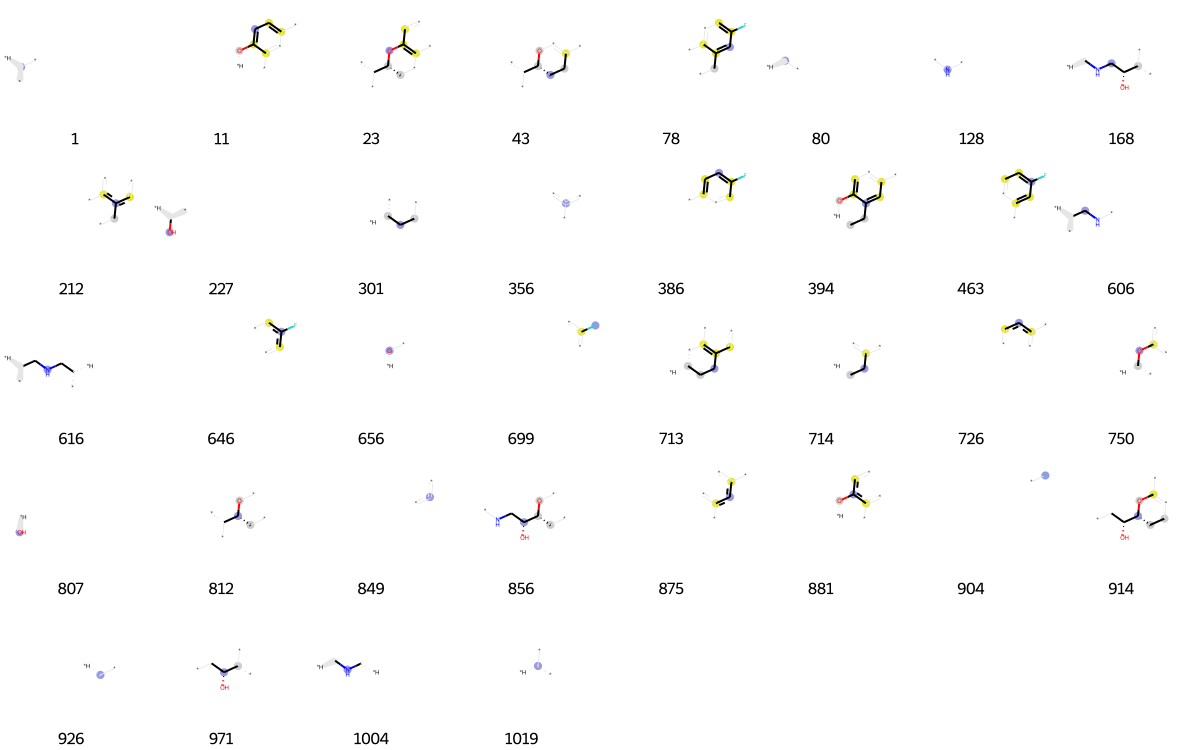

In [796]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])